In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\saipr\\Credit-Risk-Modelling\\data\\credit_risk_dataset.csv")

In [3]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.shape

(32581, 12)

In [6]:
df.select_dtypes(include='number').columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [7]:
df.select_dtypes(include='object').columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [8]:
df.nunique

<bound method DataFrame.nunique of        person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_

In [9]:
int(df.duplicated().sum())

165

In [10]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [13]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [14]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
df.isnull().mean() * 100  


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

## Exploratory Data Analysis

1) categorical Features

2) categorical Features vs Target variable 

3) categorical Features vs others

In [16]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [18]:
df.select_dtypes(include='object').isnull().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
cb_person_default_on_file    0
dtype: int64

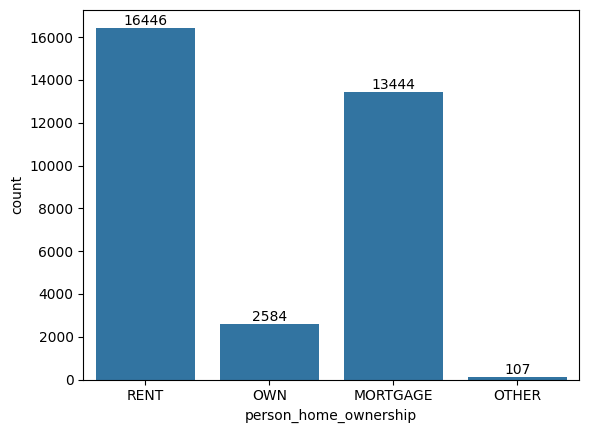

In [19]:
ax=sns.countplot(x=df['person_home_ownership'])
for bars in ax.containers:
    ax.bar_label(bars)

(np.float64(-1.0999998078619317),
 np.float64(1.0999999898800363),
 np.float64(-1.0999992995232746),
 np.float64(1.0999906604882557))

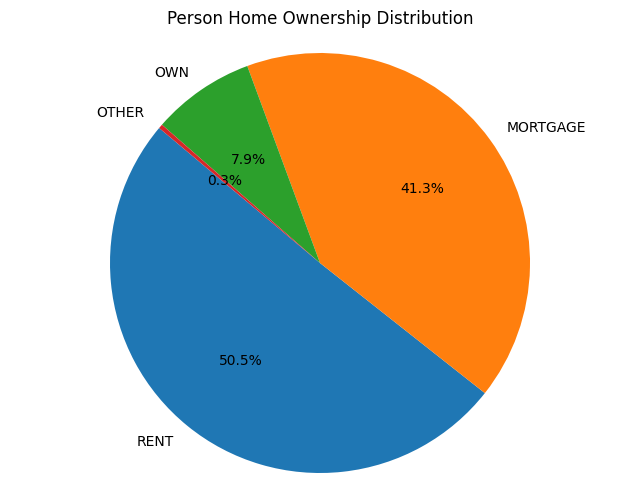

In [20]:
import matplotlib.pyplot as plt

labels = df['person_home_ownership'].value_counts().index
sizes = df['person_home_ownership'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Person Home Ownership Distribution')
plt.axis('equal') 


In [21]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<Axes: xlabel='loan_status', ylabel='count'>

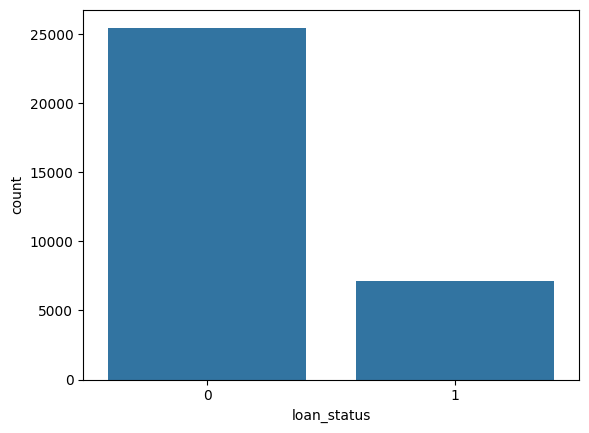

In [22]:
sns.countplot(x=df['loan_status'])

(np.float64(-1.0999999407497165),
 np.float64(1.0999998897940955),
 np.float64(-1.099999587822232),
 np.float64(1.0999932879008993))

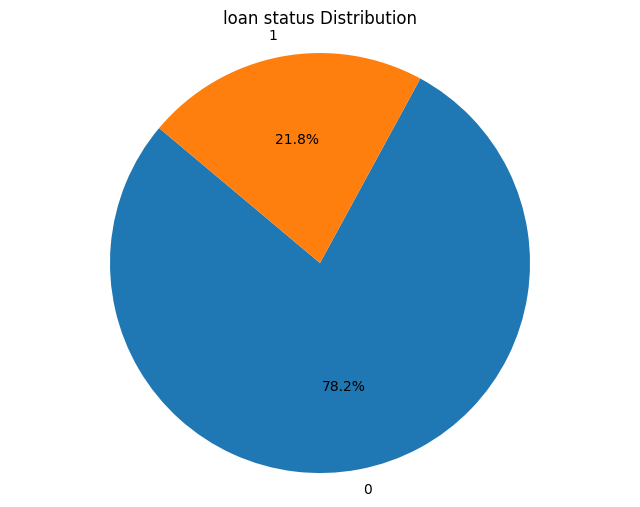

In [23]:
import matplotlib.pyplot as plt

labels = df['loan_status'].value_counts().index
sizes = df['loan_status'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('loan status Distribution')
plt.axis('equal') 


<Axes: xlabel='person_home_ownership', ylabel='count'>

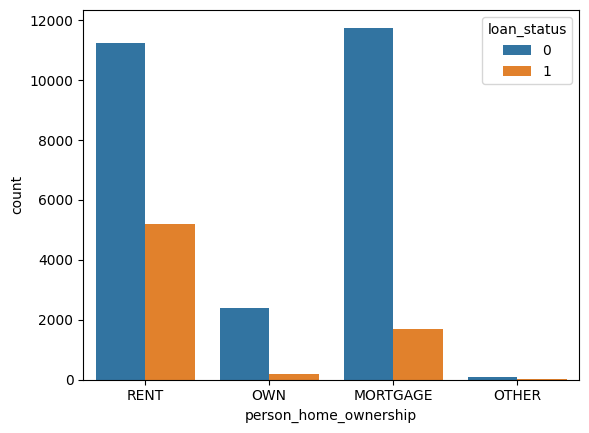

In [24]:
sns.countplot(x=df['person_home_ownership'],hue=df['loan_status'])

In [25]:
ownership_default_rate = df.groupby('person_home_ownership')['loan_status'].mean()
print(ownership_default_rate)


person_home_ownership
MORTGAGE    0.125707
OTHER       0.308411
OWN         0.074690
RENT        0.315700
Name: loan_status, dtype: float64


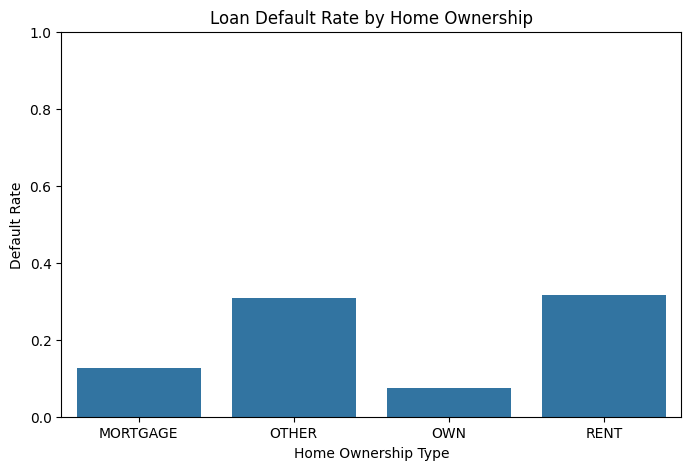

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

ownership_default_rate = df.groupby('person_home_ownership')['loan_status'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=ownership_default_rate, x='person_home_ownership', y='loan_status')
plt.title('Loan Default Rate by Home Ownership')
plt.ylabel('Default Rate')
plt.xlabel('Home Ownership Type')
plt.ylim(0, 1)
plt.show()


In [27]:
pd.crosstab(df['person_home_ownership'], df['loan_status'])


loan_status,0,1
person_home_ownership,,
MORTGAGE,11754,1690
OTHER,74,33
OWN,2391,193
RENT,11254,5192


In [28]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')


loan_status,0,1
person_home_ownership,,
MORTGAGE,0.874293,0.125707
OTHER,0.691589,0.308411
OWN,0.925310,0.074690
RENT,0.684300,0.315700


In [29]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['person_home_ownership'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")


Chi-square statistic: 1907.980698188821
p-value: 0.0


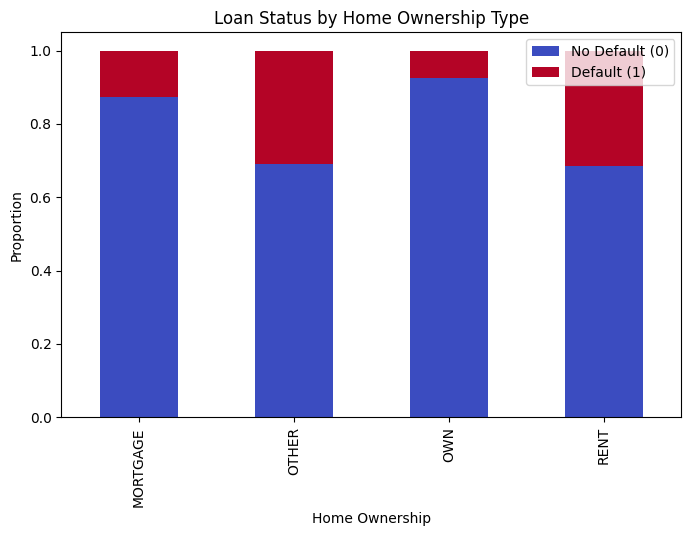

In [30]:
contingency = pd.crosstab(df['person_home_ownership'], df['loan_status'], normalize='index')
contingency.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))

plt.title('Loan Status by Home Ownership Type')
plt.ylabel('Proportion')
plt.xlabel('Home Ownership')
plt.legend(['No Default (0)', 'Default (1)'])
plt.show()


Axes(0.22375,0.11;0.5775x0.77)
Axes(0.22375,0.11;0.5775x0.77)


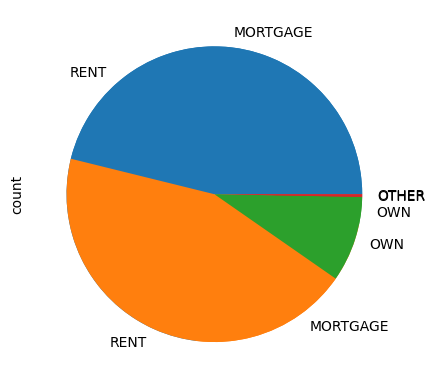

In [31]:
print(df[df['loan_status'] == 1]['person_home_ownership'].value_counts().plot.pie())
print(df[df['loan_status'] == 0]['person_home_ownership'].value_counts().plot.pie())


1. Home Ownership vs. Loan Default Rates
Renters (RENT) have the highest number of loan defaults (orange bars).

Mortgage holders (MORTGAGE) have a significantly lower default rate compared to renters.

Owners (OWN) have the lowest absolute number of defaults, indicating they are the most stable borrowers.

Other (OTHER) has very few data points, making it hard to analyze.


🔍 Implication: Renters are at higher risk of loan default compared to homeowners and mortgage holders.

2. Statistical Significance of Relationship (Chi-Square Test)
The Chi-square statistic = 1907.98 is very high.

The p-value = 0.0 (effectively < 0.05), meaning there is a significant relationship between person_home_ownership and loan_status.


🔍 Implication: The probability of loan default depends on home ownership type and is not random.

3. Mortgage Holders Are Less Risky Borrowers
Despite having a high number of borrowers, mortgage holders have a low default rate.

This suggests that people who own homes via mortgage are more financially stable.

🔍 Implication: Banks may offer lower interest rates or better loan terms to mortgage holders since they pose a lower default risk.




🔍 Summary of Conclusion

Home Ownership Affects Loan Default Rates

Renters (RENT) have the highest default rate, indicating financial instability.

Mortgage holders (MORTGAGE) and Owners (OWN) have lower default rates, suggesting they are more financially stable.

Statistically Significant Relationship

The Chi-square test (p-value = 0.0) confirms that home ownership is strongly associated with loan default risk.




Risk-Based Lending Strategy

High Risk → Renters (🔴) → Stricter loan approvals, higher interest rates.

Low Risk → Homeowners/Mortgage Holders (🟢) → Better loan terms, lower interest rates.



Further Investigation Needed

The "Other" category needs deeper analysis to understand its default patterns.

Exploring income levels and loan amounts could refine risk predictions.

📌 Final Takeaway: Lenders should prioritize mortgage holders and homeowners for loans while applying stricter policies for renters to reduce default risk. 🚀









🏦 "Person_home_ownership" is a strong predictor of loan default. Renters are at the highest risk, while mortgage holders and owners are safer borrowers. Lenders should adjust loan terms accordingly to minimize risk.

In [32]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [33]:
import warnings
warnings.filterwarnings('ignore')

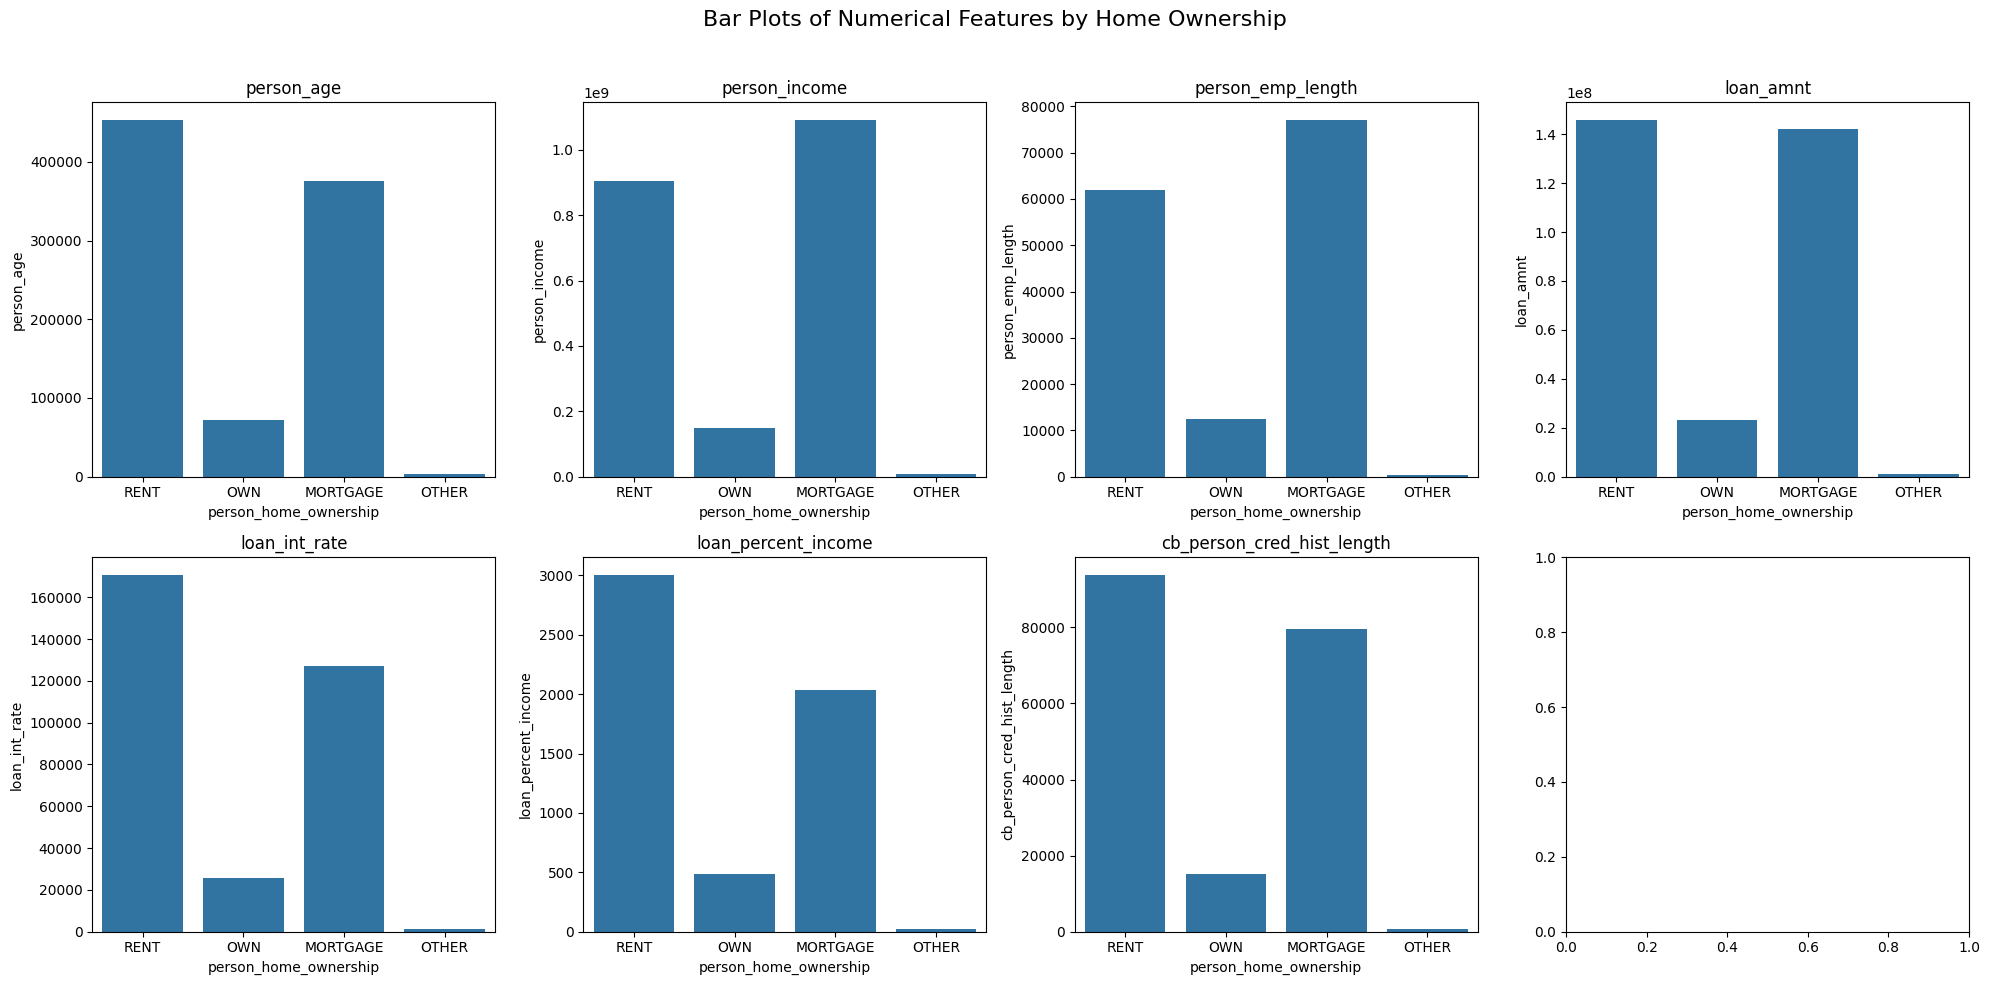

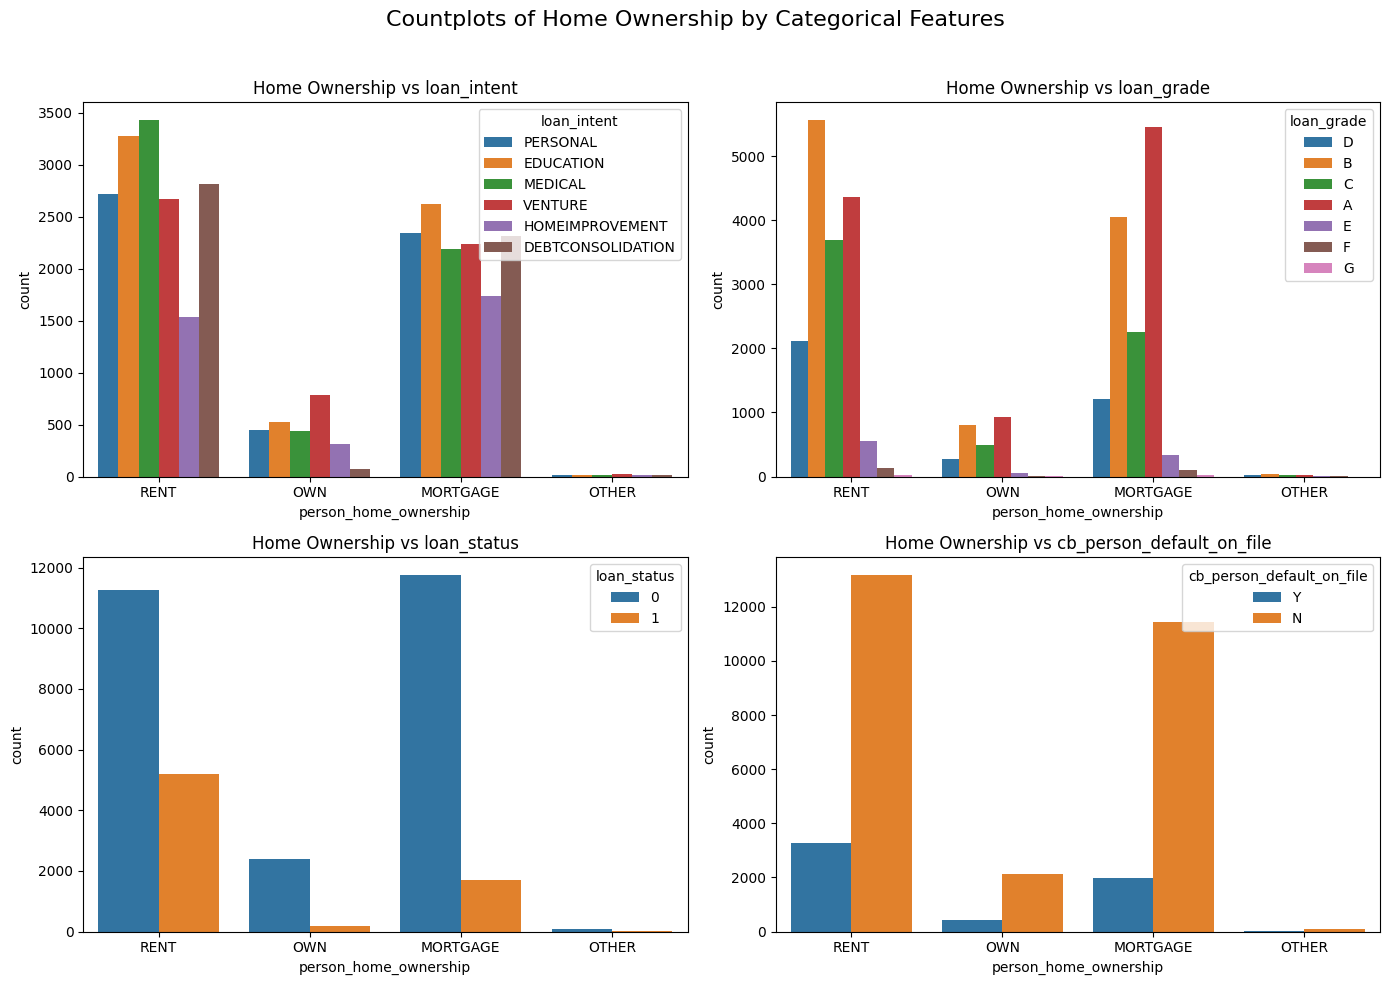

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Bar Plots of Numerical Features by Home Ownership', fontsize=16)

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 4)
    sns.barplot(x=df['person_home_ownership'], y=df[col], estimator=sum, ci=None, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Countplots of Home Ownership by Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=df['person_home_ownership'], hue=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Home Ownership vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


In [35]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical features to test against person_home_ownership
categorical_features = ['loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

# Dictionary to store results
chi_results = {}

# Perform Chi-square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df['person_home_ownership'], df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_results[feature] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Is Significant': 'Yes' if p < 0.05 else 'No'
    }

# Display results as a DataFrame
results_df = pd.DataFrame(chi_results).T
print(results_df)


                          Chi2 Statistic p-value Degrees of Freedom  \
loan_intent                    760.87211     0.0                 15   
loan_grade                    743.432477     0.0                 18   
loan_status                  1907.980698     0.0                  3   
cb_person_default_on_file     139.440269     0.0                  3   

                          Is Significant  
loan_intent                          Yes  
loan_grade                           Yes  
loan_status                          Yes  
cb_person_default_on_file            Yes  


In [36]:
results_df

,Chi2 Statistic,p-value,Degrees of Freedom,Is Significant
loan_intent,760.87211,0.0,15,Yes
loan_grade,743.432477,0.0,18,Yes
loan_status,1907.980698,0.0,3,Yes
cb_person_default_on_file,139.440269,0.0,3,Yes


.

📊 What Insights Can We Derive?

1. 🏠 person_home_ownership vs loan_intent

The type of loan intent (e.g., MEDICAL, EDUCATION, PERSONAL) is not evenly distributed among renters, owners, and mortgage holders.

For example, renters may apply more for PERSONAL or MEDICAL loans, while homeowners may be more inclined toward HOME IMPROVEMENT or DEBT CONSOLIDATION.

2. 🏠 person_home_ownership vs loan_grade

Loan grades (A to G) are associated with home ownership types.

Likely, mortgage holders and owners get better loan grades, suggesting lower credit risk.

3. 🏠 person_home_ownership vs loan_status

Strong relationship: Default rate (loan_status = 1) is significantly higher for renters.

This is a key insight for risk modeling and credit scoring.

4. 🏠 person_home_ownership vs cb_person_default_on_file

Renters likely have a higher past default history, as indicated by this relationship.

Indicates credit risk profiles vary by home ownership.



In [37]:
from scipy.stats import kruskal

# Numerical features to test
numerical_features = ['person_age', 'person_income', 'person_emp_length', 
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                      'cb_person_cred_hist_length']

# Store results
kruskal_results = {}

# Perform Kruskal-Wallis test for each numerical feature
for feature in numerical_features:
    groups = [group[feature].dropna() for name, group in df.groupby('person_home_ownership')]
    stat, p = kruskal(*groups)
    kruskal_results[feature] = {
        'Kruskal-Wallis Statistic': stat,
        'p-value': p,
        'Is Significant': 'Yes' if p < 0.05 else 'No'
    }

# Display results
kruskal_df = pd.DataFrame(kruskal_results).T
print(kruskal_df)


                           Kruskal-Wallis Statistic p-value Is Significant
person_age                                97.070017     0.0            Yes
person_income                           3870.313463     0.0            Yes
person_emp_length                       2021.588785     0.0            Yes
loan_amnt                                514.823035     0.0            Yes
loan_int_rate                            645.851729     0.0            Yes
loan_percent_income                      712.646826     0.0            Yes
cb_person_cred_hist_length                47.348327     0.0            Yes


✅ Final Conclusion:

Home ownership is a strong predictor of loan behavior and credit risk. Lenders can use it to enhance approval decisions, pricing models, and risk segmentation.

In [38]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


loan_intent

In [39]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

<Axes: xlabel='loan_intent', ylabel='count'>

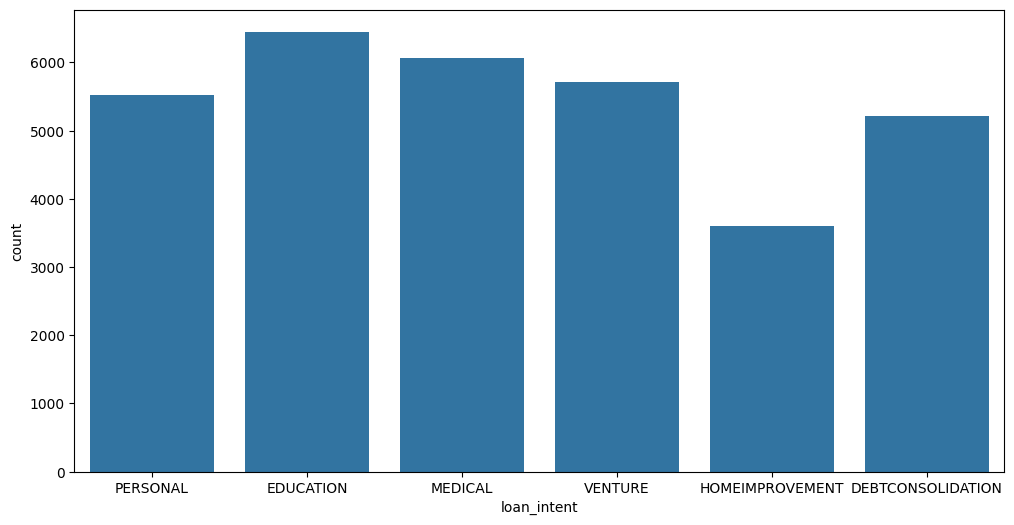

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['loan_intent'])

(np.float64(-1.0999992951733217),
 np.float64(1.0999974318459214),
 np.float64(-1.0999977351390333),
 np.float64(1.0999982832292805))

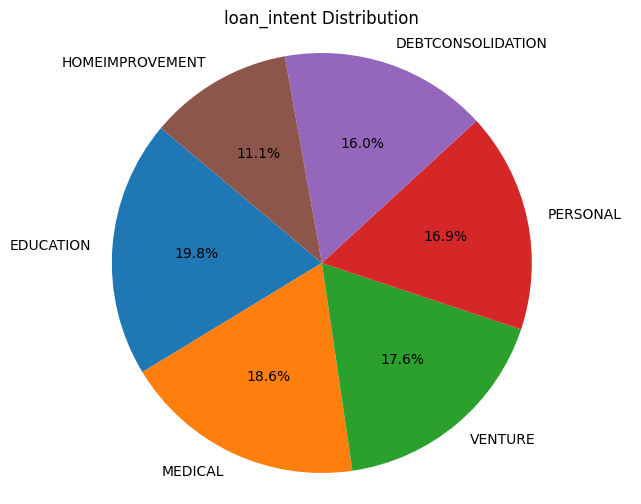

In [41]:
import matplotlib.pyplot as plt

labels = df['loan_intent'].value_counts().index
sizes = df['loan_intent'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('loan_intent Distribution')
plt.axis('equal') 


<Axes: xlabel='loan_intent', ylabel='count'>

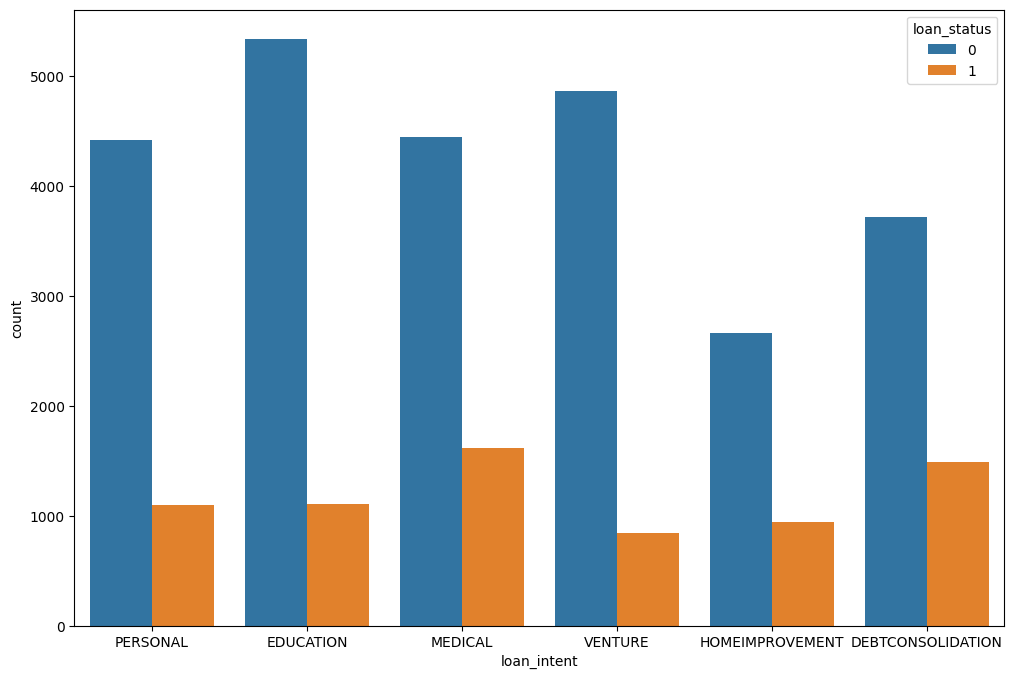

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['loan_intent'],hue=df['loan_status'])

In [43]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['loan_intent'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")


Chi-square statistic: 520.5115614374077
p-value: 2.980681669776041e-110



🔥 Conclusion

Loan intent strongly influences default risk.

Medical and debt consolidation loans are riskier, requiring stricter lending policies.

Venture and home improvement loans have lower risk, making them safer for approval.

Lenders can use this insight to adjust credit policies and reduce default rates.



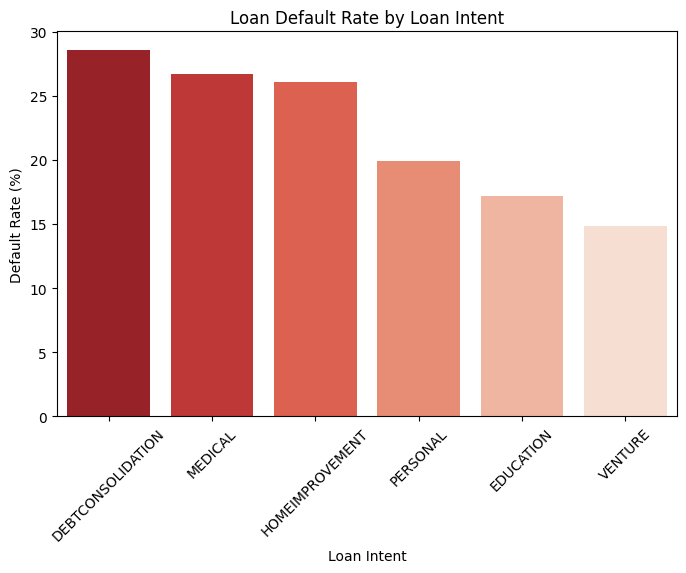

In [44]:
df_default_rate = df.groupby('loan_intent')['loan_status'].mean() * 100
df_default_rate = df_default_rate.sort_values(ascending=False)  # Sort high to low
plt.figure(figsize=(8, 5))
sns.barplot(x=df_default_rate.index, y=df_default_rate.values, palette="Reds_r")
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate (%)')
plt.title('Loan Default Rate by Loan Intent')
plt.xticks(rotation=45)
plt.show()


In [45]:
import scipy.stats as stats

contingency = pd.crosstab(df['loan_intent'], df['loan_status'])

chi2, p, dof, expected = stats.chi2_contingency(contingency)
contributions = (contingency - expected) ** 2 / expected

print("Chi-square Contributions:\n", contributions)


Chi-square Contributions:
 loan_status                0           1
loan_intent                             
DEBTCONSOLIDATION  30.567201  109.543939
EDUCATION          17.461666   62.577520
HOMEIMPROVEMENT     8.471150   30.358133
MEDICAL            18.524709   66.387155
PERSONAL            2.626812    9.413728
VENTURE            35.905326  128.674223


:
📌 Summary of Conclusion: Loan Intent vs. Loan Default Risk

1️⃣ DEBT CONSOLIDATION has the highest number of defaults (absolute count).

The bar plot shows that most loan defaulters come from Debt Consolidation loans.

This is because more people take out these loans, so naturally, there are more defaults in total.

2️⃣ VENTURE loans have the highest relative risk of default.

The chi-square test shows that VENTURE loans deviate the most from expected values, meaning they have a much higher-than-expected default rate.

Even though they have fewer actual defaulters, their risk of default per borrower is the highest.

Lenders should closely evaluate applications for Venture loans and consider stricter approval criteria.

3️⃣ MEDICAL and EDUCATION loans also show significant default risk.

Medical loans may be riskier due to unexpected healthcare costs.

Education loans may have uncertain repayment abilities (e.g., students without stable jobs).

4️⃣ PERSONAL and HOME IMPROVEMENT loans are the least risky.

Their actual defaults are lower than expected, making them safer categories.

Lenders may offer better interest rates for these borrowers.

📊 Business Implications for Lenders:

✅ Tighter approval and higher interest rates for Venture and Debt Consolidation loans.

✅ Flexible repayment plans for Medical and Education loans to reduce defaults.

✅ Lower interest rates and easier approvals for Personal and Home Improvement loans.



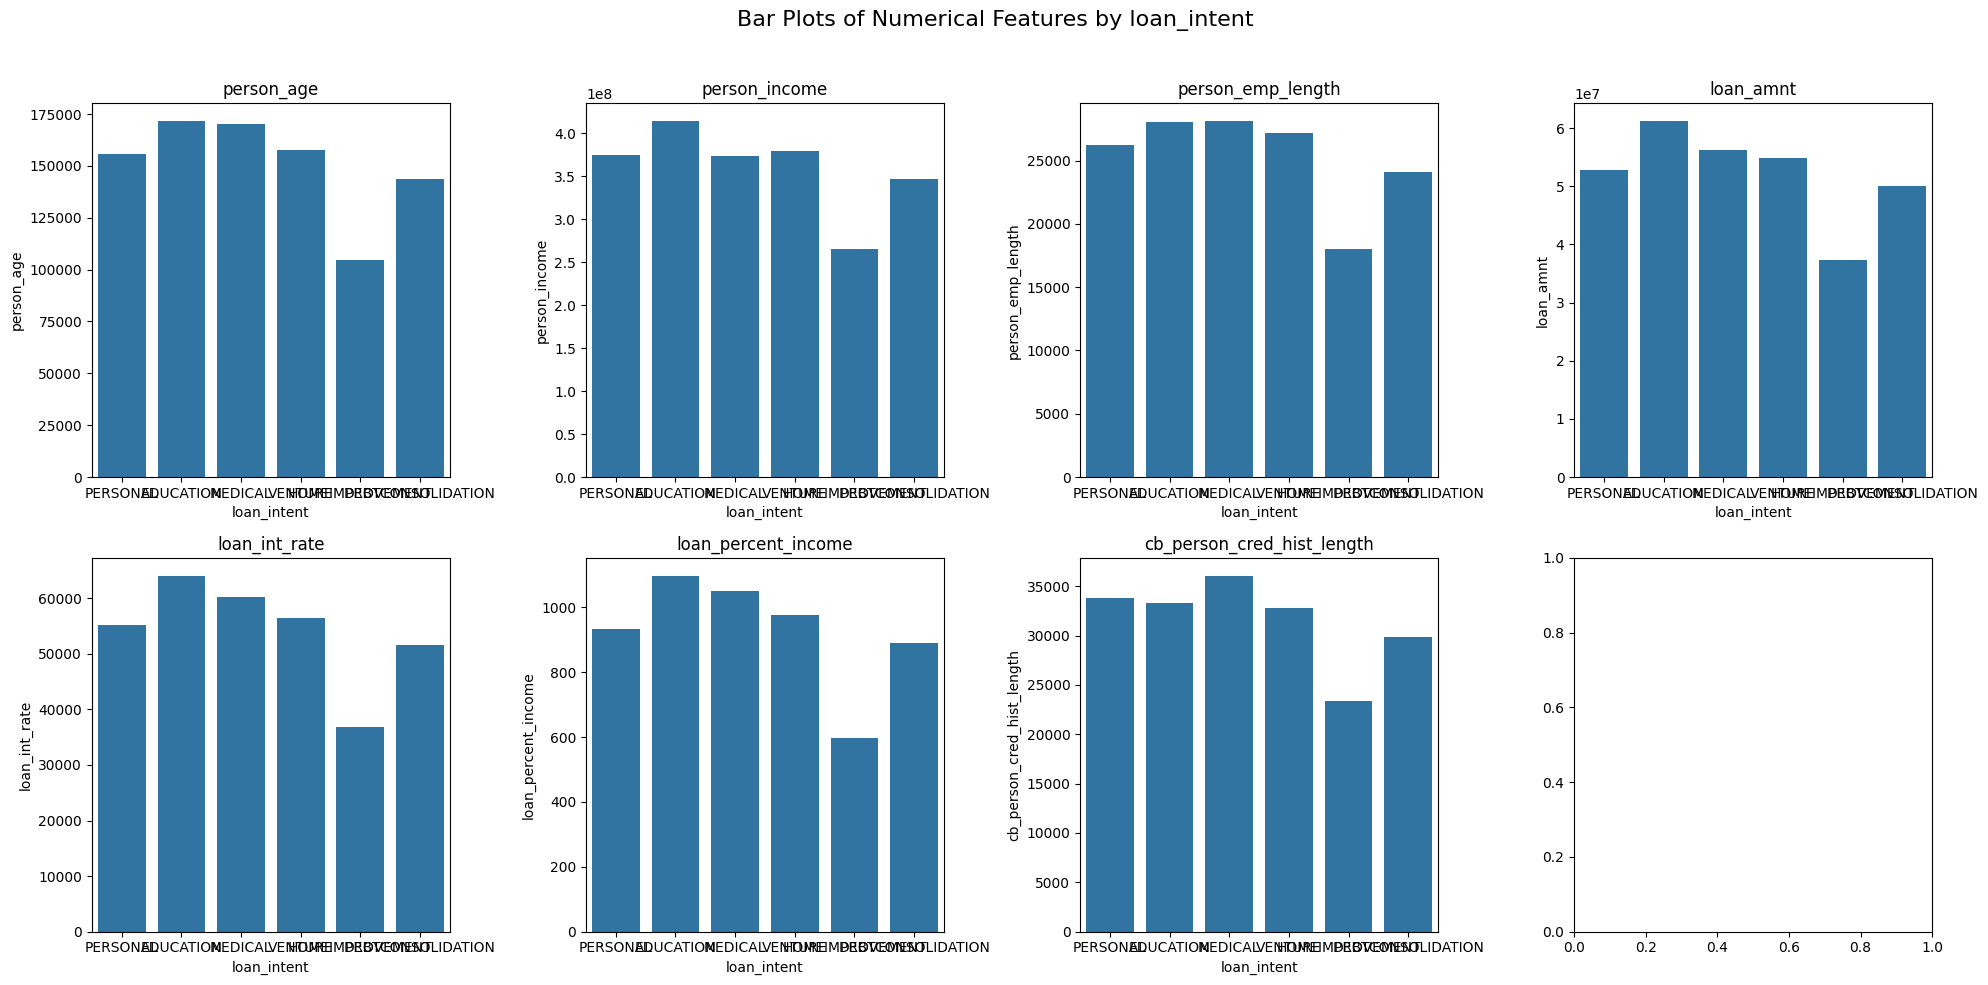

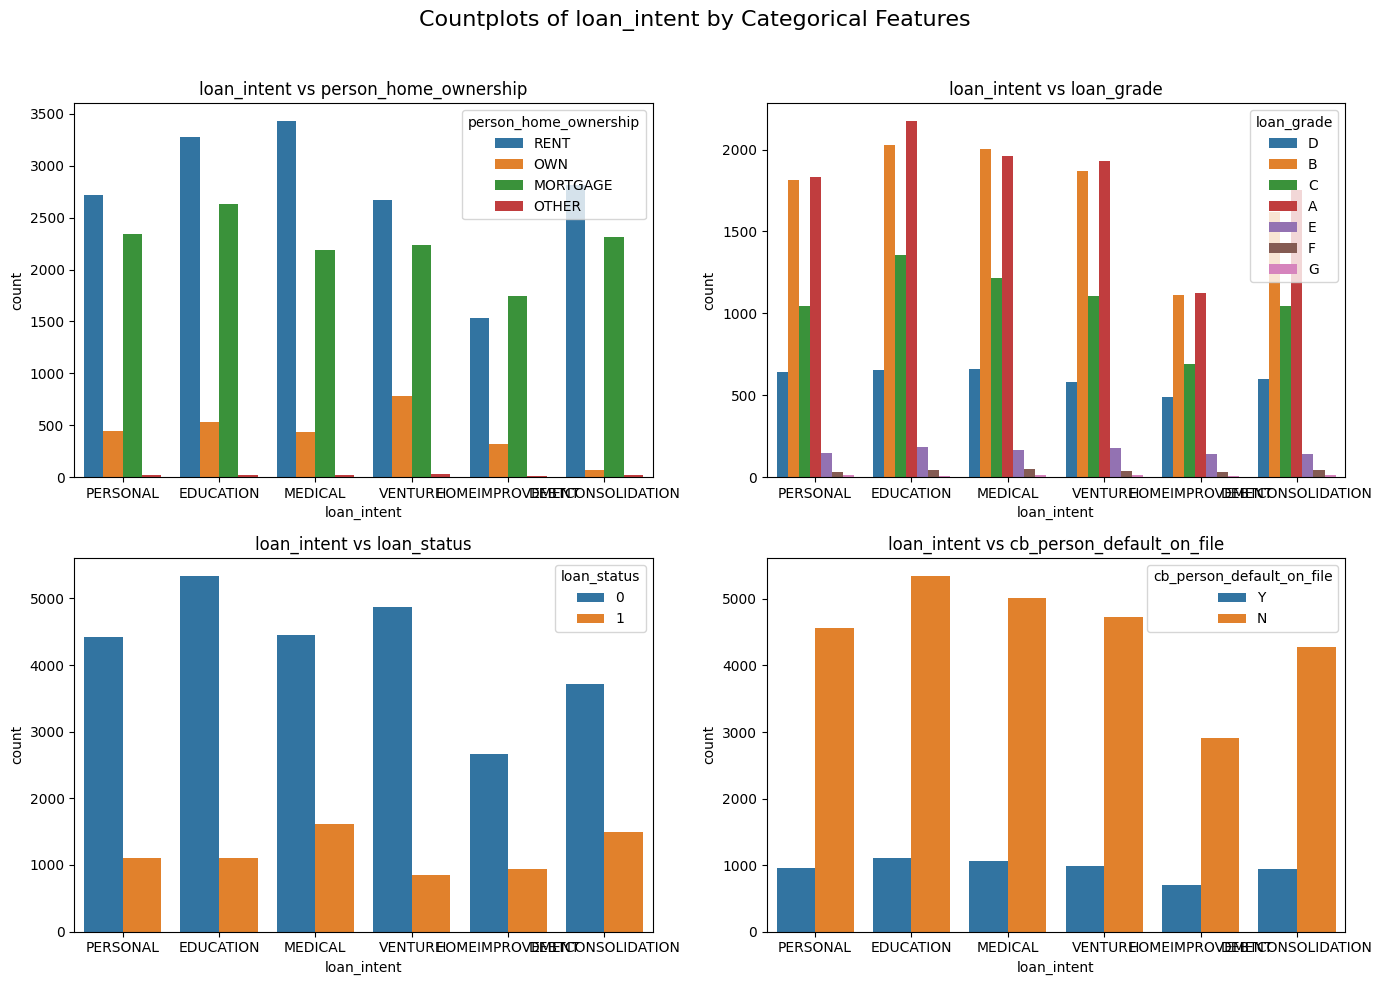

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Bar Plots of Numerical Features by loan_intent', fontsize=16)

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 4)
    sns.barplot(x=df['loan_intent'], y=df[col], estimator=sum, ci=None, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Countplots of loan_intent by Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=df['loan_intent'], hue=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'loan_intent vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


In [47]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [48]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = ['person_home_ownership', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

chi_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df['loan_intent'], df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_results[feature] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Is Significant': 'Yes' if p < 0.05 else 'No'
    }

results_df = pd.DataFrame(chi_results).T
results_df


,Chi2 Statistic,p-value,Degrees of Freedom,Is Significant
person_home_ownership,760.87211,0.0,15,Yes
loan_grade,78.469826,0.000003,30,Yes
loan_status,520.511561,0.0,5,Yes
cb_person_default_on_file,9.367654,0.095268,5,No


:
📌 Summary of Chi-Square Test for Loan Intent & Other Categorical Features

1️⃣ Loan Intent vs. Home Ownership (Significant ✅)

Strong relationship between loan intent and person's home ownership status.

Certain loan types may be more common for renters vs. homeowners.

Lenders can tailor loan policies based on home ownership status.

2️⃣ Loan Intent vs. Loan Grade (Significant ✅)

Loan grades vary significantly based on the purpose of the loan.

Some loan intents (e.g., Education, Medical) might receive lower grades due to higher risk.

Debt Consolidation and Personal loans could have a wider spread in grades.

3️⃣ Loan Intent vs. Loan Status (Significant ✅)

Default rates vary significantly across different loan intents.

Debt Consolidation and Venture loans show higher defaults.

Lenders should consider stricter risk evaluation for risky loan intents.

4️⃣ Loan Intent vs. Credit Default History (NOT Significant ❌)

No strong relationship between loan intent and past default history.

Borrowers with prior defaults take loans for various reasons, not just a few specific categories.

This means past default history alone isn’t a strong predictor of loan intent.




📊 Key Business Takeaways for Lenders:

✅ Use home ownership as a factor in loan approvals & interest rates.

✅ Assign loan grades carefully based on intent type.

✅ Implement stricter risk assessment for high-default intents.

✅ Do NOT rely solely on past defaults to predict loan intent.


In [49]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


loan_grade

<Axes: xlabel='loan_grade', ylabel='count'>

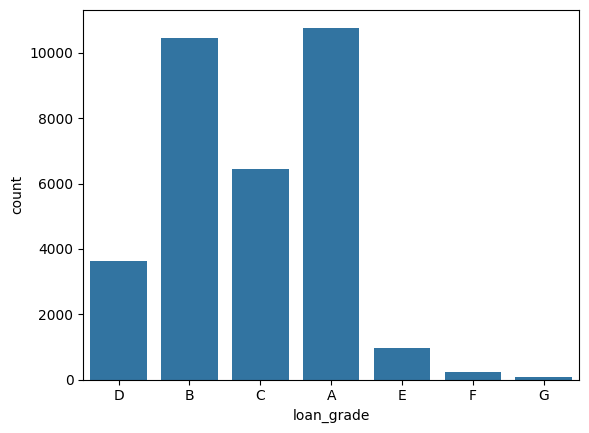

In [50]:
sns.countplot(x=df['loan_grade'])

(np.float64(-1.0999980361253028),
 np.float64(1.099997822083395),
 np.float64(-1.099998204257062),
 np.float64(1.0999998104339817))

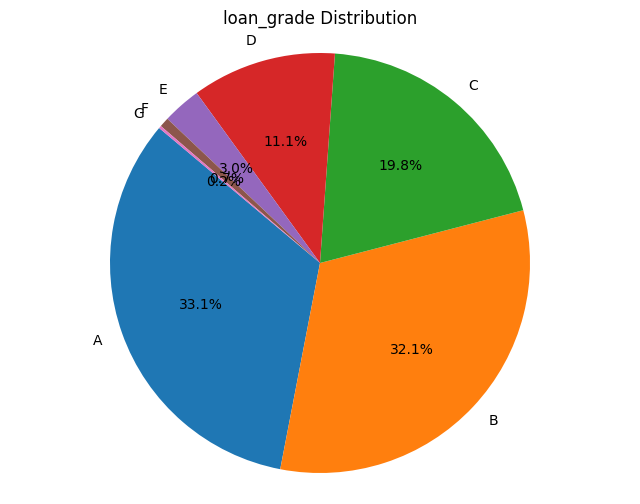

In [51]:
import matplotlib.pyplot as plt

labels = df['loan_grade'].value_counts().index
sizes = df['loan_grade'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('loan_grade Distribution')
plt.axis('equal') 


<Axes: xlabel='loan_grade', ylabel='count'>

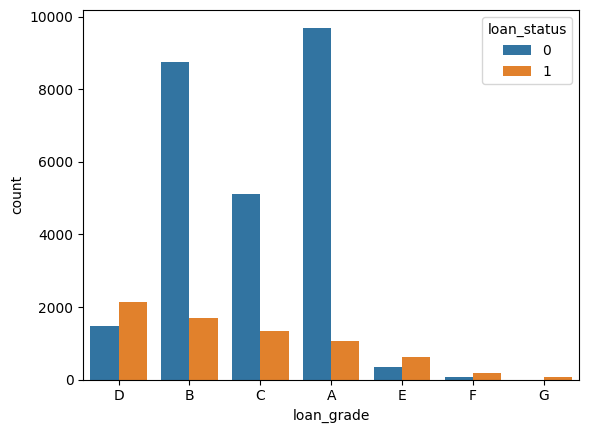

In [52]:
sns.countplot(x=df['loan_grade'],hue=df['loan_status'])

In [53]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['loan_grade'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")


Chi-square statistic: 5609.184186567319
p-value: 0.0


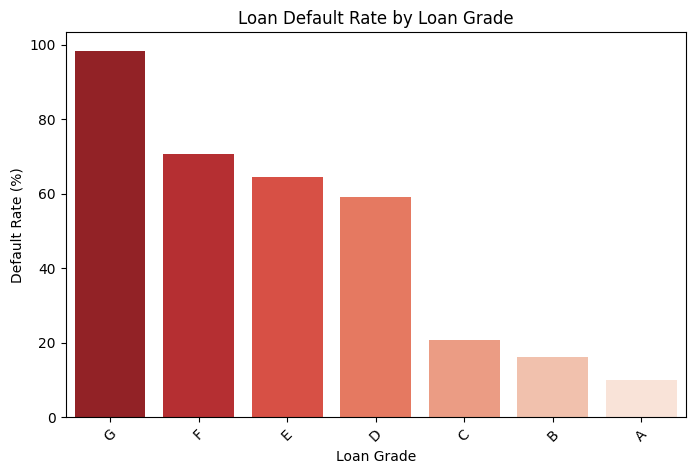

In [54]:
df_default_rate = df.groupby('loan_grade')['loan_status'].mean() * 100
df_default_rate = df_default_rate.sort_values(ascending=False)  # Sort high to low
plt.figure(figsize=(8, 5))
sns.barplot(x=df_default_rate.index, y=df_default_rate.values, palette="Reds_r")
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate (%)')
plt.title('Loan Default Rate by Loan Grade')
plt.xticks(rotation=45)
plt.show()


🔹 Key Insight:

Loan Grade G is the riskiest category despite having fewer total loans. Lenders should be cautious about granting loans in this grade due to the high chance of default.


In [55]:
df.groupby('loan_grade')['loan_status'].mean()

loan_grade
A    0.099564
B    0.162760
C    0.207340
D    0.590458
E    0.644191
F    0.705394
G    0.984375
Name: loan_status, dtype: float64

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']

chi_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df['loan_grade'], df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_results[feature] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Is Significant': 'Yes' if p < 0.05 else 'No'
    }

results_df = pd.DataFrame(chi_results).T
results_df


,Chi2 Statistic,p-value,Degrees of Freedom,Is Significant
person_home_ownership,743.432477,0.0,18,Yes
loan_intent,78.469826,0.000003,30,Yes
loan_status,5609.184187,0.0,6,Yes
cb_person_default_on_file,13053.044593,0.0,6,Yes


:
🔍 Insights from Chi-Square Test and Graphs
1️⃣ Chi-Square Test Interpretation
The Chi-square statistic (5609.18) is very high, and the p-value is 0.0, meaning there is a strong association between loan_grade and loan_status (default or non-default).

This confirms that loan grade significantly impacts the likelihood of loan default.

2️⃣ Graph Insights (Countplot & Default Rate Plot)
✅ Loan Grade G has the highest default rate (~100%), but it has very few total loans.

This means that almost all borrowers in Grade G are highly risky, but lenders already approve very few loans in this category.

Risk: Even if approved in small numbers, these loans are almost guaranteed to default.

✅ Loan Grades A and B have the lowest default rates (~5-15%), and they dominate in total loan count.

These are the safest loans, making them attractive for lenders.

✅ Loan Grades C, D, E, and F have a moderate to high default risk, with increasing default rates as the grade worsens.

Mid-tier grades (C, D) contribute to a significant portion of defaults in absolute numbers, as seen in the count plot.





🔹 Key Takeaways for Lenders

📌 Loan approvals should favor Grades A and B, as they have low default rates.

📌 Loans in Grades D, E, F, and especially G should be granted cautiously or with higher interest rates to mitigate risk.

📌 Mid-tier grades (C and D) still have many loans, so managing their risk is critical.

📌 Since Loan Grade strongly affects default risk (confirmed by chi-square test), it should be a key factor in risk assessment models.


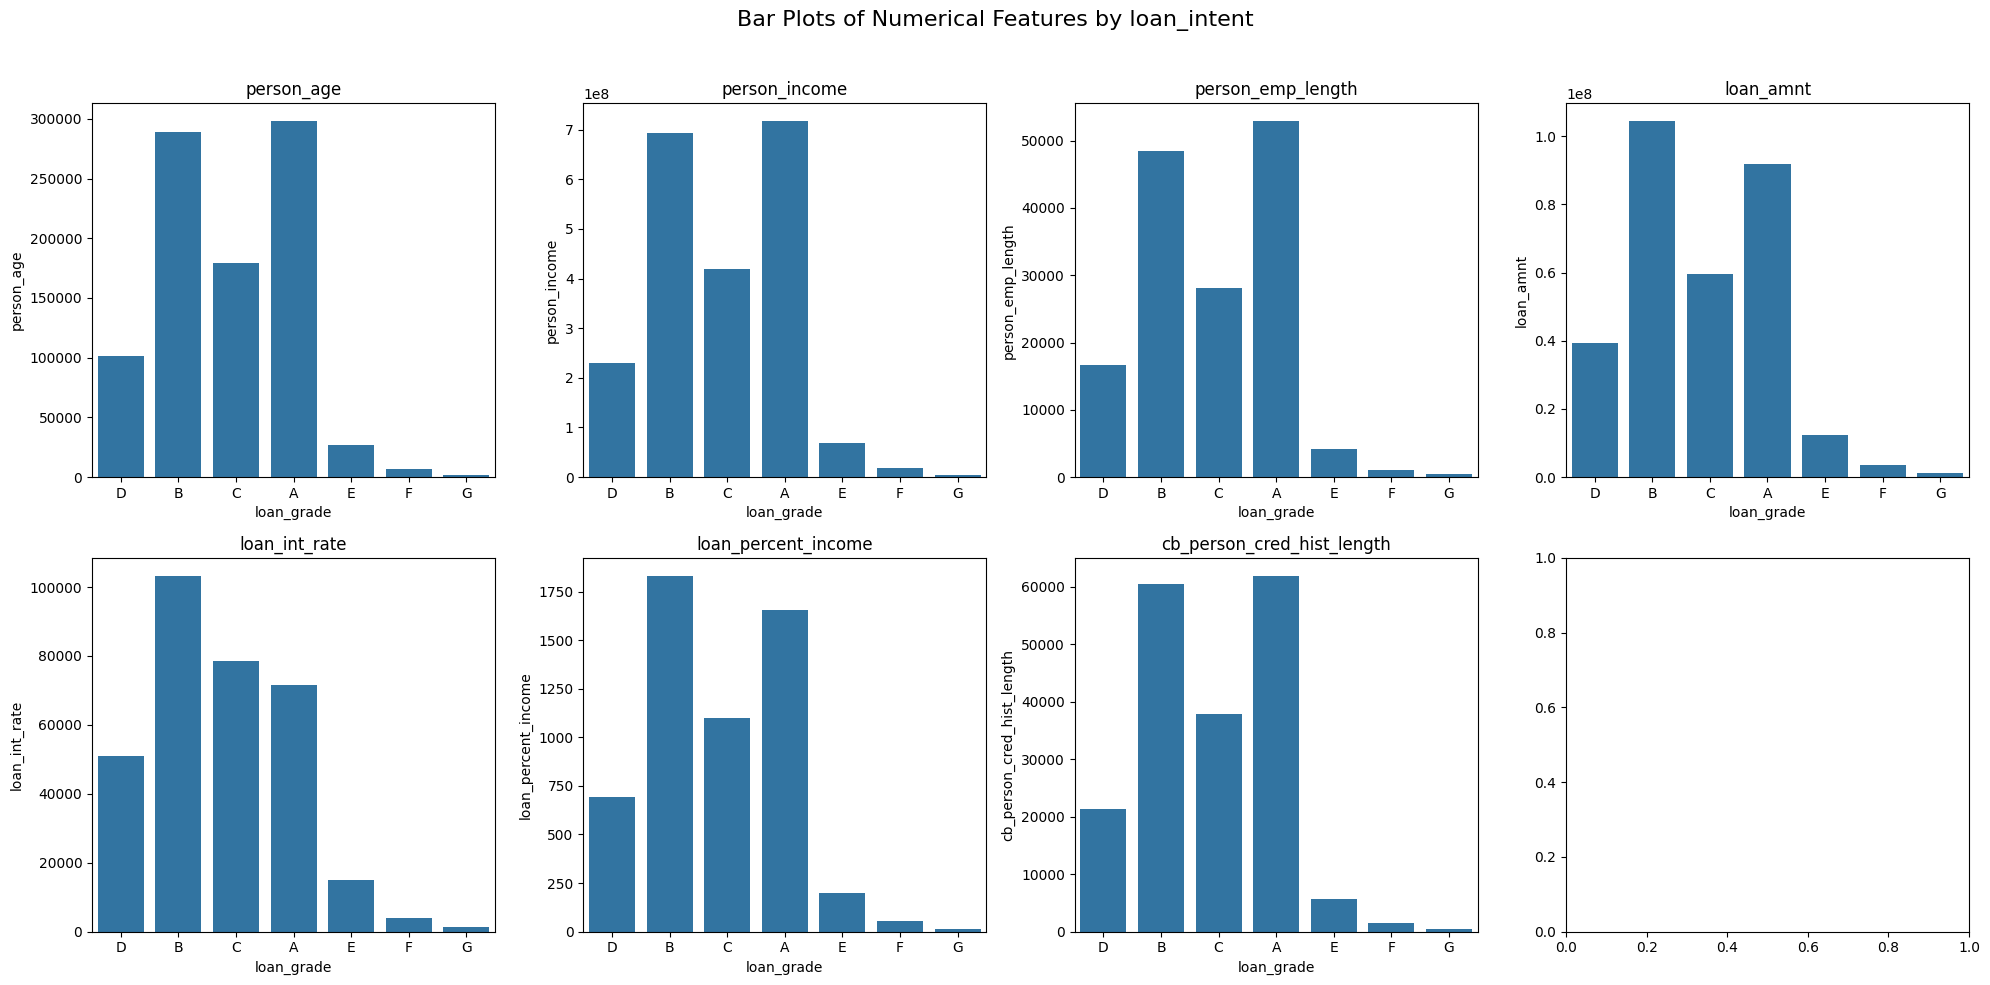

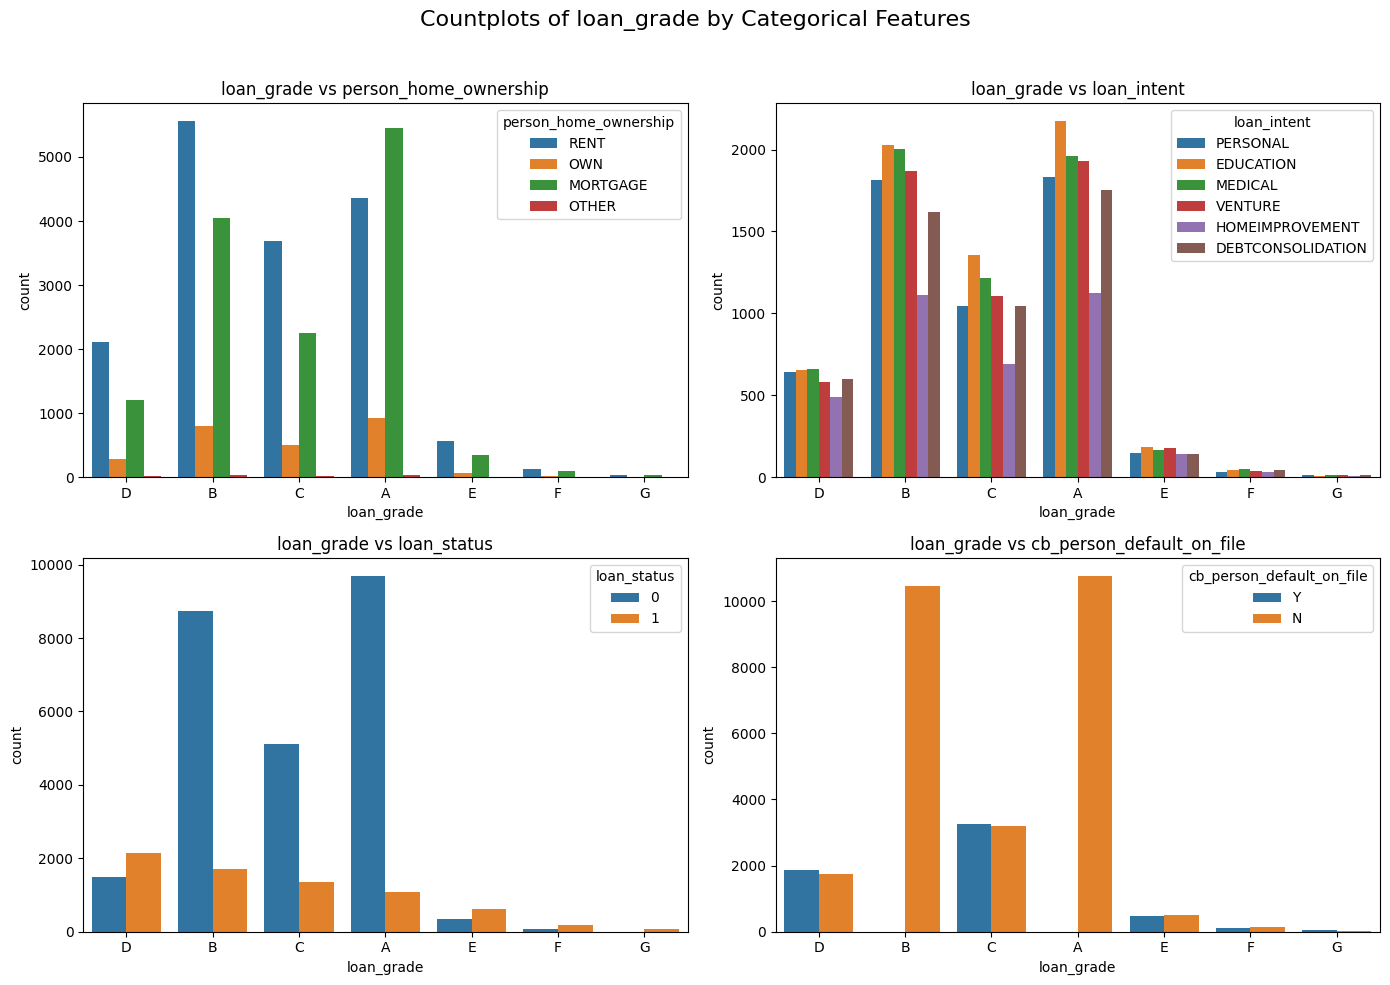

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_status', 'cb_person_default_on_file']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Bar Plots of Numerical Features by loan_intent', fontsize=16)

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 4)
    sns.barplot(x=df['loan_grade'], y=df[col], estimator=sum, ci=None, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Countplots of loan_grade by Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=df['loan_grade'], hue=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'loan_grade vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


cb_person_default_on_file

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

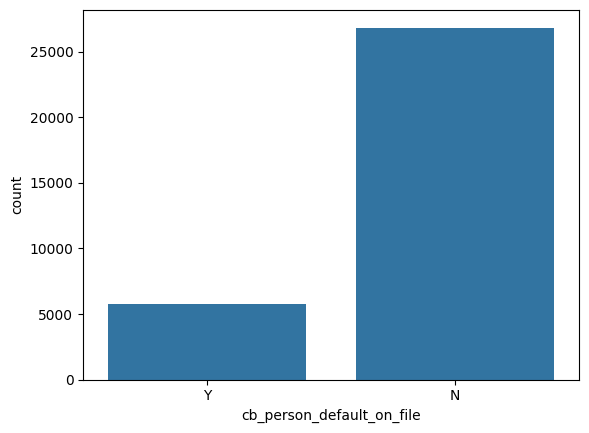

In [58]:
sns.countplot(x=df['cb_person_default_on_file'])

(np.float64(-1.0999999771187032),
 np.float64(1.0999999856162423),
 np.float64(-1.0999998336049341),
 np.float64(1.0999965062968289))

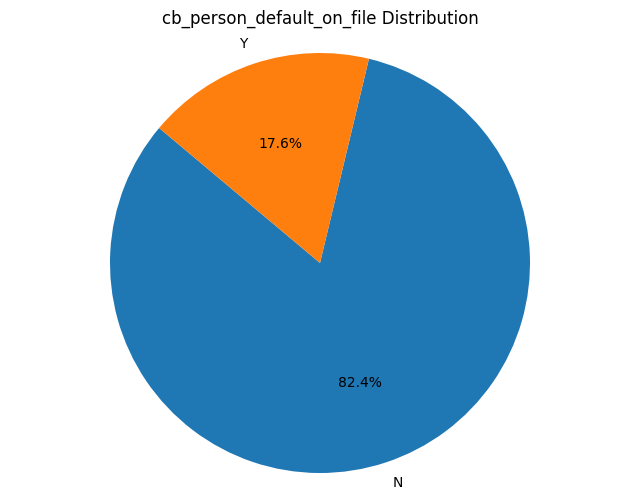

In [59]:
import matplotlib.pyplot as plt

labels = df['cb_person_default_on_file'].value_counts().index
sizes = df['cb_person_default_on_file'].value_counts().values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('cb_person_default_on_file Distribution')
plt.axis('equal') 


<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

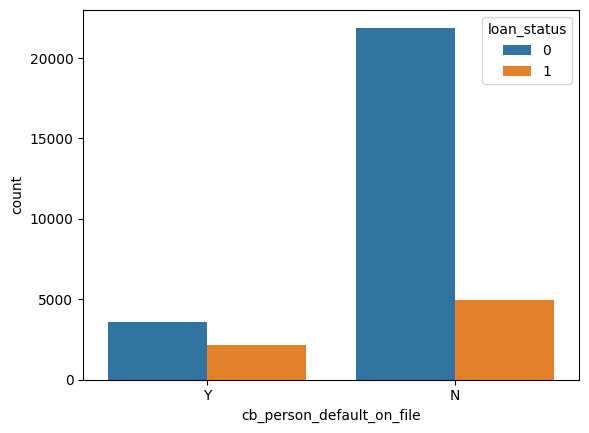

In [60]:
sns.countplot(x=df['cb_person_default_on_file'],hue=df['loan_status'])

In [61]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['cb_person_default_on_file'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")


Chi-square statistic: 1044.4395947711112
p-value: 3.934660154785392e-229


In [62]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_status', 'loan_grade']

chi_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df['cb_person_default_on_file'], df[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_results[feature] = {
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof,
        'Is Significant': 'Yes' if p < 0.05 else 'No'
    }

results_df = pd.DataFrame(chi_results).T
results_df

,Chi2 Statistic,p-value,Degrees of Freedom,Is Significant
person_home_ownership,139.440269,0.0,3,Yes
loan_intent,9.367654,0.095268,5,No
loan_status,1044.439595,0.0,1,Yes
loan_grade,13053.044593,0.0,6,Yes


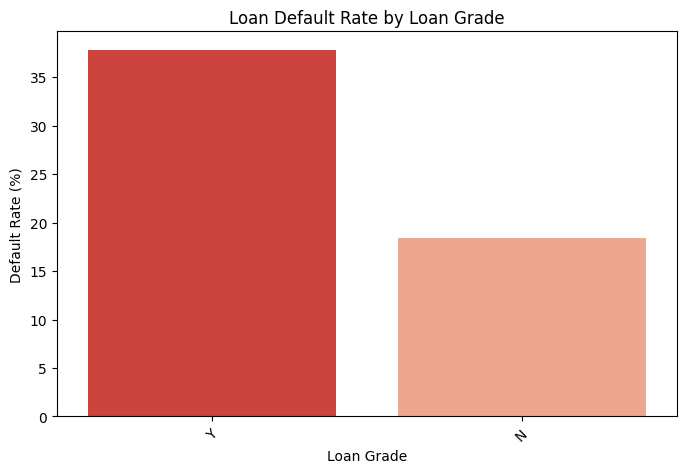

In [63]:
df_default_rate = df.groupby('cb_person_default_on_file')['loan_status'].mean() * 100
df_default_rate = df_default_rate.sort_values(ascending=False)  # Sort high to low
plt.figure(figsize=(8, 5))
sns.barplot(x=df_default_rate.index, y=df_default_rate.values, palette="Reds_r")
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate (%)')
plt.title('Loan Default Rate by Loan Grade')
plt.xticks(rotation=45)
plt.show()


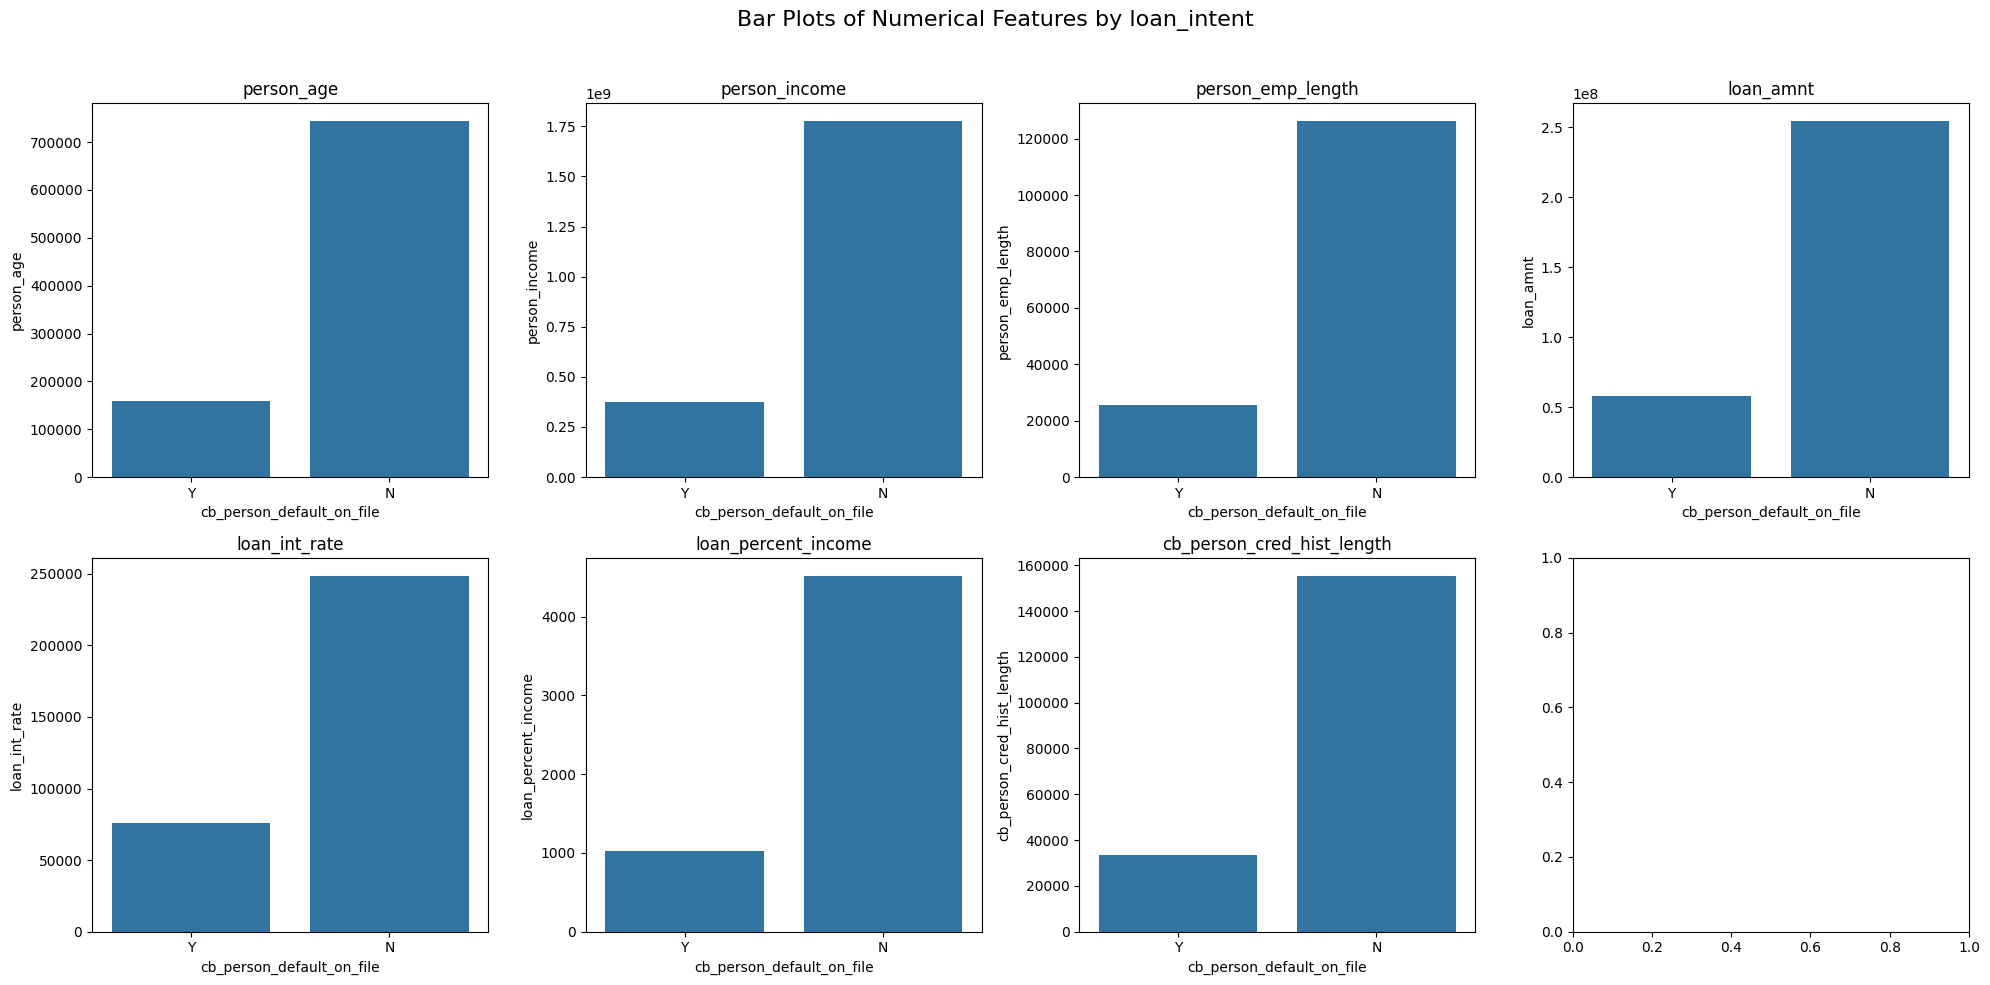

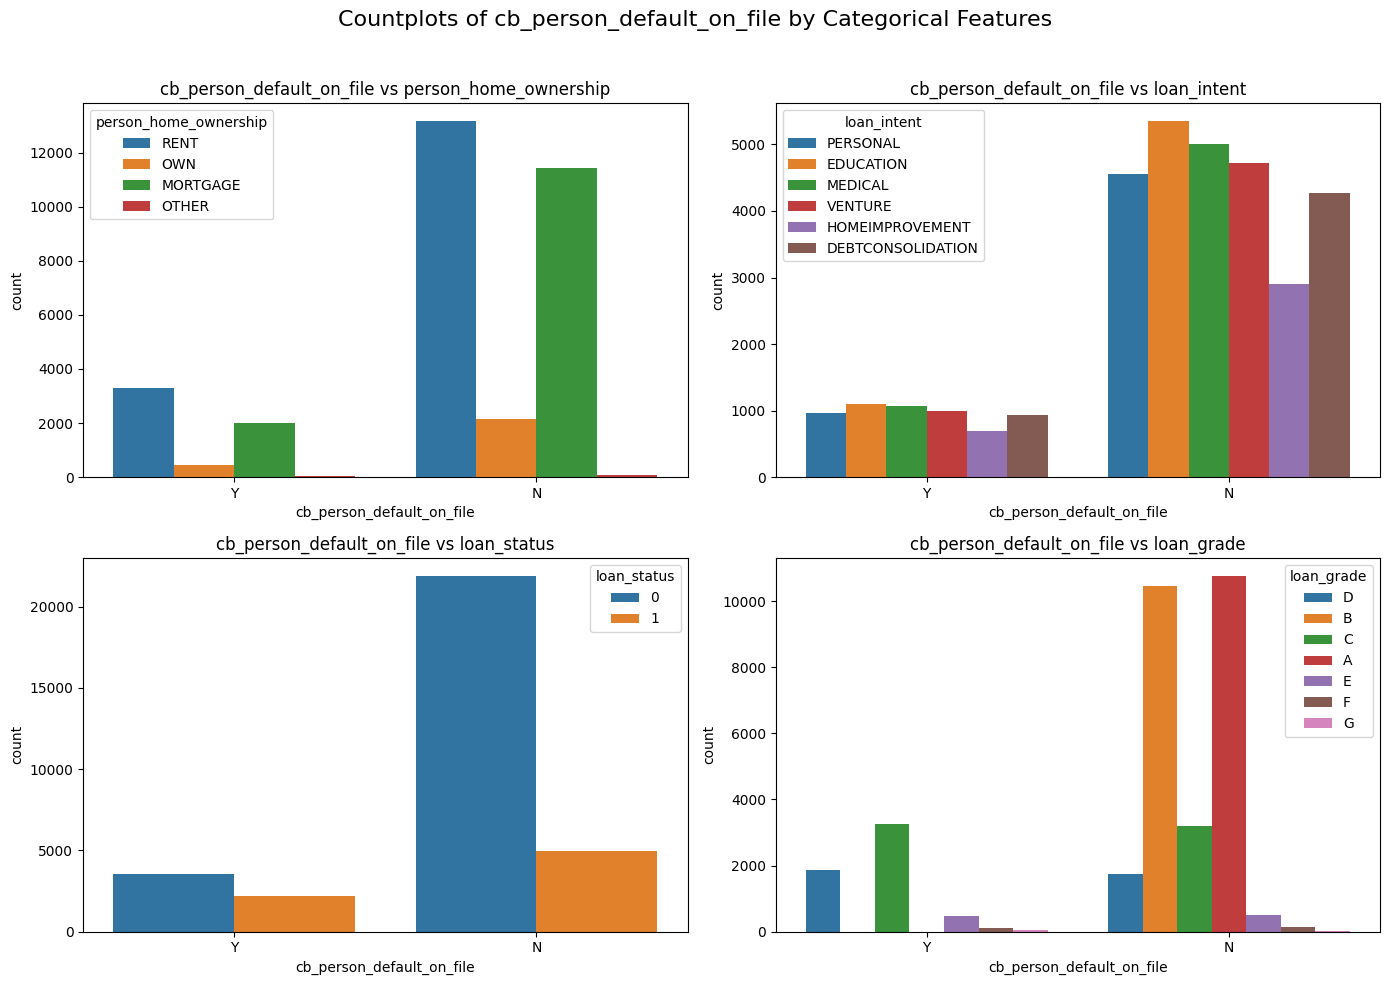

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_status', 'loan_grade']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Bar Plots of Numerical Features by loan_intent', fontsize=16)

for i, col in enumerate(numerical_features):
    row, col_idx = divmod(i, 4)
    sns.barplot(x=df['cb_person_default_on_file'], y=df[col], estimator=sum, ci=None, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Countplots of cb_person_default_on_file by Categorical Features', fontsize=16)

for i, col in enumerate(categorical_features):
    row, col_idx = divmod(i, 2)
    sns.countplot(x=df['cb_person_default_on_file'], hue=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'cb_person_default_on_file vs {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  

🔍 Summary of Findings on cb_person_default_on_file and Loan Risk
1️⃣ Chi-Square Test Insights
Strong Association with Loan Status (Default vs. Non-Default)

Chi-square statistic: 1044.44, p-value: ~0 ➝ Highly significant

People with a past default ("Y") have a much higher chance of defaulting again.

Lenders should consider past defaults as a critical risk factor.

No Significant Relationship with Loan Intent

Chi-square p-value = 0.095, which is greater than 0.05 ➝ Not significant.

Past default history does not strongly correlate with loan purpose.

This suggests that borrowers with defaults apply for loans across all categories similarly.

Significant Impact on Loan Grade

Chi-square statistic: 13053.04, p-value: ~0 ➝ Very strong relationship.

Borrowers with past defaults tend to receive lower loan grades (higher risk category loans).

This confirms that credit rating agencies heavily penalize previous defaulters, assigning them worse grades.

Association with Home Ownership

Chi-square statistic: 139.44, p-value: 0.0 ➝ Significant relationship.

This indicates that homeownership status may be linked to a borrower’s credit history.

Homeowners might have better financial stability, leading to fewer defaults.

2️⃣ Graph Interpretation (Countplot)
Majority of Borrowers Have No Past Defaults ("N")

Most loans come from people without previous defaults, which is expected in lending.

Default Rate is Higher for Past Defaulters ("Y")

The orange bars (loan defaults) are much higher for past defaulters than non-defaulters.

Lenders should exercise extreme caution when lending to borrowers with past defaults.



📌 Key Takeaways for Lenders

✅ Past default history is a strong predictor of future loan default. Borrowers with defaults should face stricter lending criteria or higher interest rates.

✅ Loan grades are strongly affected by past defaults. Borrowers with previous defaults tend to receive riskier loans.

✅ Loan intent does not significantly affect past default behavior, so loan type alone is not a reliable indicator of risk.

✅ Homeownership status is linked to past defaults, suggesting that homeowners may be lower risk compared to non-homeowners.

🔹 Actionable Advice:

Use past default status as a critical feature in risk assessment models.

Implement higher interest rates, lower loan amounts, or stricter approval rules for past defaulters.

Consider homeownership as a stability factor in lending decisions.

## Final Conclusion about categorical features

📊 Summary of Findings on Categorical Features and Loan Default Risk

Based on our chi-square tests and visual analysis of categorical features, we can summarize our key insights into loan default risk factors.

1️⃣ Loan Intent & Loan Default Risk

🔹 Key Findings:

✅ Significant Relationship with Loan Default (p-value ≈ 0.0)

✅ Highest Risk Loan Types:

Debt Consolidation & Venture loans contribute most to defaults.

Medical & Education loans also have considerable risk, possibly due to unstable financial situations.

✅ Lowest Risk Loan Types:

Personal & Home Improvement loans have the lowest contribution to defaults.

🏦 Lender Recommendations:

🔸 Tighten approval criteria or increase interest rates for Debt Consolidation & Venture loans.

🔸 Offer better terms for Personal & Home Improvement loans as they are low risk.

2️⃣ Loan Grade & Default Risk

🔹 Key Findings:

✅ Loan Grade is strongly correlated with default risk (p-value ≈ 0.0).

✅ Higher Grades (A, B, C) have the lowest default rates.

✅ Lower Grades (D, E, F, G) have a much higher default rate.

✅ Grade G has the highest default percentage but the lowest count of total borrowers.

📌 Why the Difference?

The countplot shows fewer defaults for Grade G, but the default rate barplot shows Grade G has the highest percentage of defaulters.

Fewer loans are issued to Grade G borrowers, but most of them default, making their risk disproportionately high.

🏦 Lender Recommendations:

🔸 Charge higher interest rates for lower grades (D, E, F, G).

🔸 Restrict lending for Grade G borrowers as their risk is extremely high.

🔸 Consider risk-based pricing where interest rates align with default risk.

3️⃣ Home Ownership & Default Risk

🔹 Key Findings:

✅ Significant relationship between home ownership and loan risk (p-value ≈ 0.0).

✅ Homeowners tend to default less than renters.

✅ People without homes (renters) contribute significantly to defaults.

🏦 Lender Recommendations:

🔸 Homeownership can be used as a stability indicator.

🔸 Lower interest rates for homeowners due to lower risk.

🔸 Tighter screening for renters before approval.

4️⃣ Borrower’s Past Default History & Loan Risk

🔹 Key Findings:

✅ A borrower's default history is a major predictor of future default (p-value ≈ 0.0).

✅ People with past defaults (“Y”) have a significantly higher chance of defaulting again.

✅ Loan grade is highly influenced by past defaults – borrowers with past defaults usually have lower grades and higher interest rates.

✅ No significant relationship between past defaults and loan intent (borrowers with defaults apply for various loan types).

🏦 Lender Recommendations:

🔸 Past defaults should be a key factor in risk assessment models.

🔸 Increase interest rates or deny high-risk loans to past defaulters.

🔸 Consider flexible repayment options for defaulters trying to rebuild credit.

📌 Final Conclusion & Actionable Takeaways

✅ Loan Intent, Loan Grade, Home Ownership, and Past Defaults are all significant indicators of loan default risk.

✅ Debt Consolidation, Venture, and Medical Loans have the highest risk and should have stricter approval policies.

✅ Loan Grades F & G have extremely high default rates – lenders should minimize exposure to these borrowers.

✅ Homeowners are lower risk than renters and may be eligible for better loan terms.

✅ Borrowers with past defaults have a significantly higher chance of defaulting again – lenders should closely monitor their applications.




📌 Strategic Next Steps for Lenders:


1️⃣ Implement risk-based pricing: Higher interest rates for high-risk loans and lower for low-risk loans.

2️⃣ Tighten approval criteria for high-risk loan types (Debt Consolidation, Venture, Medical).

3️⃣ Use past default status as a primary risk factor for loan approvals.

4️⃣ Encourage homeownership as a financial stability indicator.

5️⃣ Regularly review loan performance and adjust policies based on emerging trends.

📢 By applying these insights, lenders can optimize their risk management strategies and reduce loan defaults. 🚀











In [65]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Numerical Features

In [66]:
df['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

<Axes: ylabel='Density'>

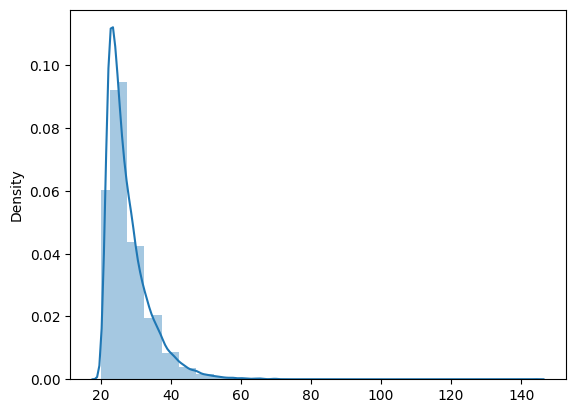

In [67]:
sns.distplot(x=df['person_age'])

In [68]:
df['person_age'].skew()

np.float64(2.5813925261849846)

<Axes: xlabel='person_age'>

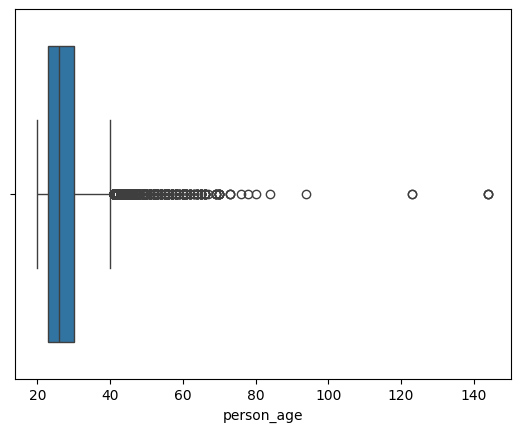

In [69]:
sns.boxplot(x=df['person_age'])

<Axes: xlabel='loan_status', ylabel='person_age'>

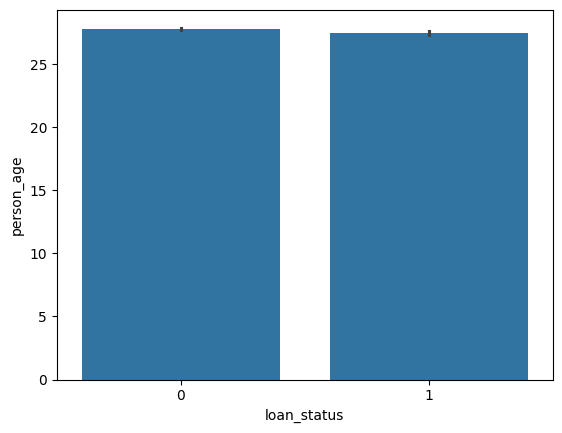

In [70]:
sns.barplot(x=df['loan_status'],y=df['person_age'])

<Axes: xlabel='loan_status', ylabel='person_age'>

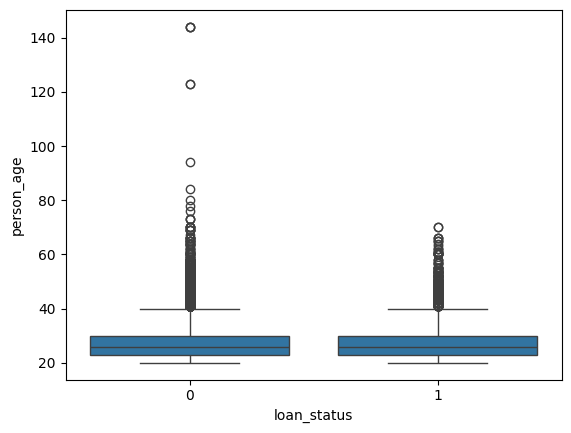

In [71]:
sns.boxplot(x=df['loan_status'],y=df['person_age'])

<Axes: xlabel='person_age', ylabel='Count'>

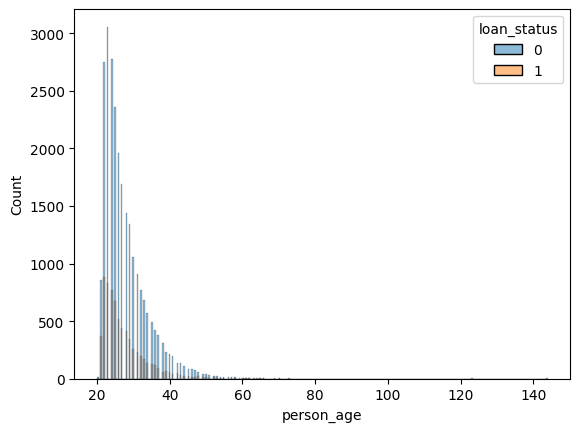

In [72]:
sns.histplot(x=df['person_age'],hue=df['loan_status'])

In [73]:
default_1=df[df['loan_status']==1]
default_0=df[df['loan_status']==0]

In [74]:
df[df['loan_status']==0]['person_age'].skew()

np.float64(2.7401899704620356)

<Axes: ylabel='Density'>

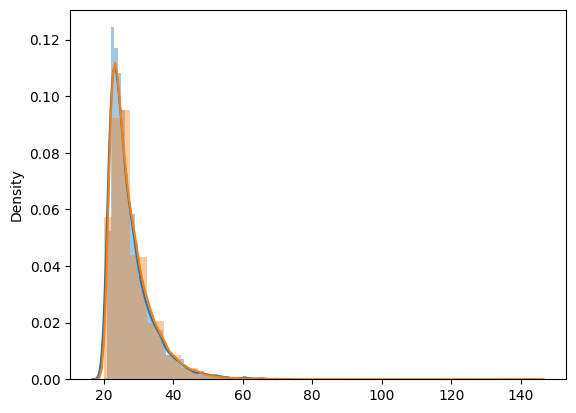

In [75]:
sns.distplot(x=default_1['person_age'])
sns.distplot(x=default_0['person_age'])

In [76]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


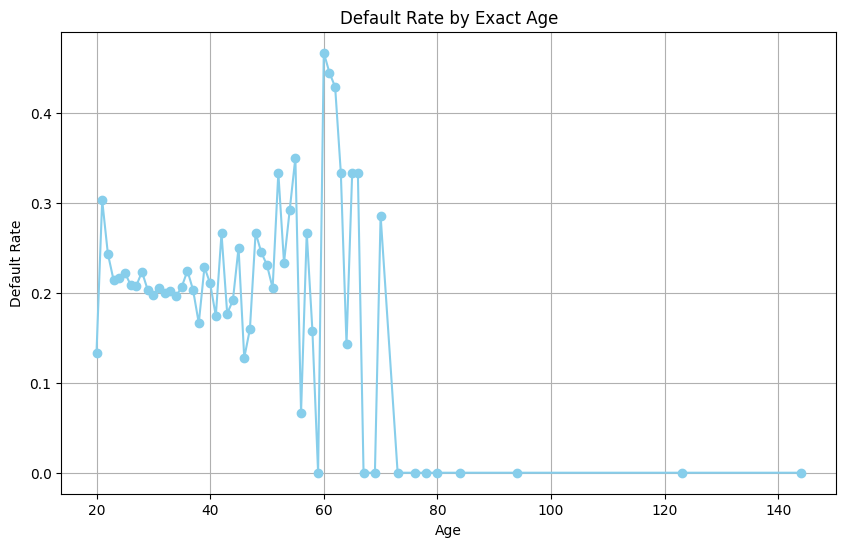

In [77]:
default_rate = df.groupby('person_age')['loan_status'].mean()

plt.figure(figsize=(10,6))
plt.plot(default_rate.index, default_rate.values, marker='o', linestyle='-', color='skyblue')
plt.title('Default Rate by Exact Age')
plt.xlabel('Age')
plt.ylabel('Default Rate')
plt.grid()
plt.show()


loan_status
0    27.807129
1    27.474676
Name: person_age, dtype: float64


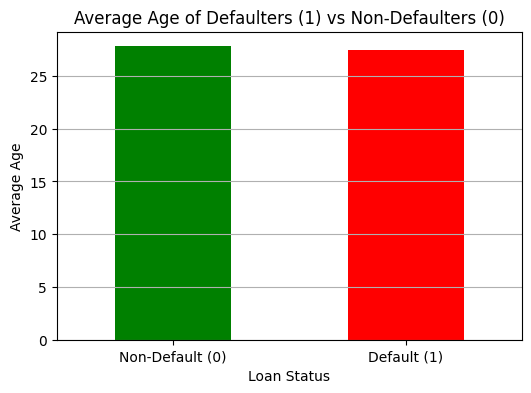

In [78]:
# Mean age by loan_status (0 = non-default, 1 = default)
mean_age = df.groupby('loan_status')['person_age'].mean()
print(mean_age)

# Bar Plot
plt.figure(figsize=(6,4))
mean_age.plot(kind='bar', color=['green', 'red'])
plt.title('Average Age of Defaulters (1) vs Non-Defaulters (0)')
plt.ylabel('Average Age')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'], rotation=0)
plt.grid(axis='y')
plt.show()


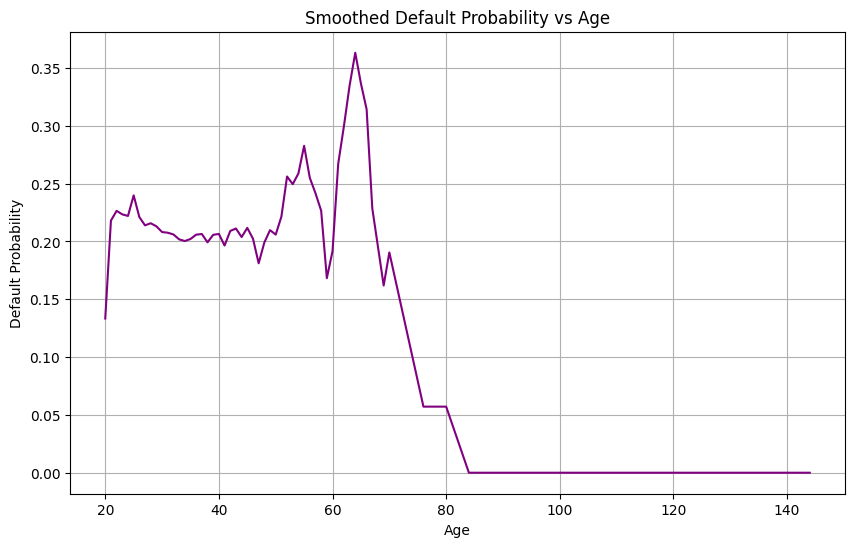

In [79]:
# Group by age
age_default = df.groupby('person_age')['loan_status'].mean()

# Smooth using rolling window
age_default_smooth = age_default.rolling(window=5, min_periods=1).mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(age_default.index, age_default_smooth, color='purple')
plt.title('Smoothed Default Probability vs Age')
plt.ylabel('Default Probability')
plt.xlabel('Age')
plt.grid()
plt.show()


In [80]:
from scipy.stats import ttest_ind

# Age of defaulters and non-defaulters
age_default = df[df['loan_status'] == 1]['person_age']
age_nondefault = df[df['loan_status'] == 0]['person_age']

# t-test
t_stat, p_val = ttest_ind(age_default, age_nondefault, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Result: Significant difference in age between defaulters and non-defaulters.")
else:
    print("Result: No significant difference in age between defaulters and non-defaulters.")


T-Statistic: -3.9420585555913483
P-Value: 8.126242164853938e-05
Result: Significant difference in age between defaulters and non-defaulters.


In [81]:
from scipy.stats import mannwhitneyu

# Split the data
age_default = df[df['loan_status'] == 1]['person_age']
age_nondefault = df[df['loan_status'] == 0]['person_age']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(age_default, age_nondefault, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Result: Significant difference in age distributions between defaulters and non-defaulters.")
else:
    print("Result: No significant difference in age distributions between defaulters and non-defaulters.")


Mann-Whitney U Statistic: 86323515.0
P-Value: 1.7400067729948436e-09
Result: Significant difference in age distributions between defaulters and non-defaulters.


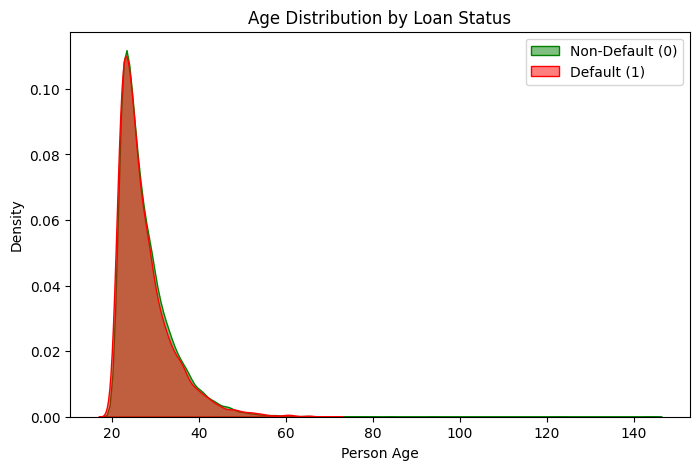

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['loan_status'] == 0], x='person_age', label='Non-Default (0)', fill=True, color='green', alpha=0.5)
sns.kdeplot(data=df[df['loan_status'] == 1], x='person_age', label='Default (1)', fill=True, color='red', alpha=0.5)

plt.title('Age Distribution by Loan Status')
plt.xlabel('Person Age')
plt.ylabel('Density')
plt.legend()
plt.show()


✅ Conclusion:

Visually: There’s no practical big difference between defaulters and non-defaulters by age.

Statistically: There’s a tiny difference, but because the sample is very large, the test detects it.

This is a classical case of:

"Statistically significant but not practically significant."

In [83]:
df.select_dtypes(include='number').corr()['person_age']

person_age                    1.000000
person_income                 0.173202
person_emp_length             0.163106
loan_amnt                     0.050787
loan_int_rate                 0.012580
loan_status                  -0.021629
loan_percent_income          -0.042411
cb_person_cred_hist_length    0.859133
Name: person_age, dtype: float64

person income

In [84]:
df['person_income'].describe()

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

<Axes: ylabel='Density'>

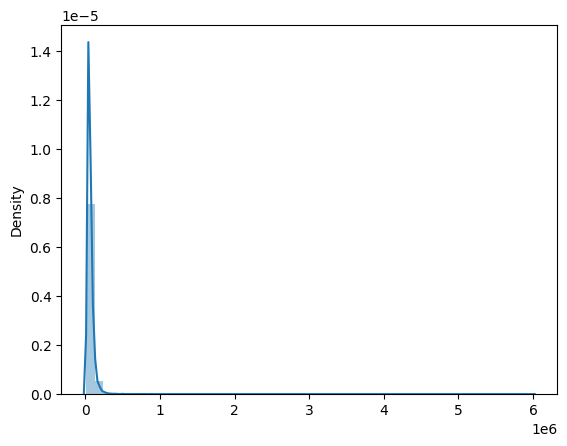

In [85]:
sns.distplot(x=df['person_income'])

<Axes: xlabel='person_income'>

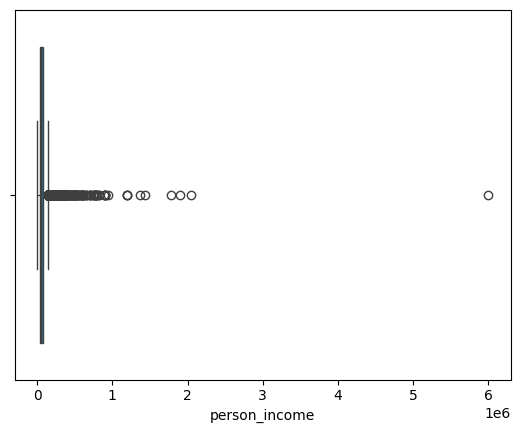

In [86]:
sns.boxplot(x=df['person_income'])

<Axes: xlabel='person_income'>

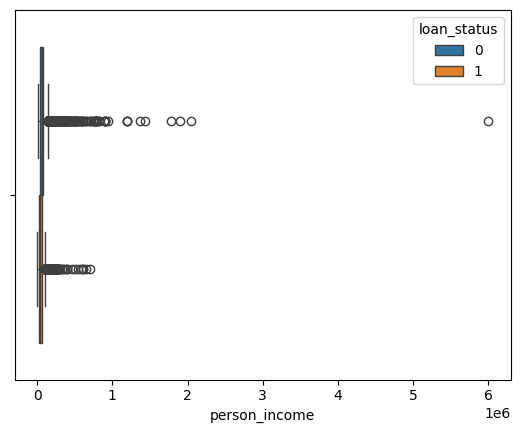

In [87]:
sns.boxplot(x=df['person_income'],hue=df['loan_status'])

loan_status
0    70804.361559
1    49125.652223
Name: person_income, dtype: float64


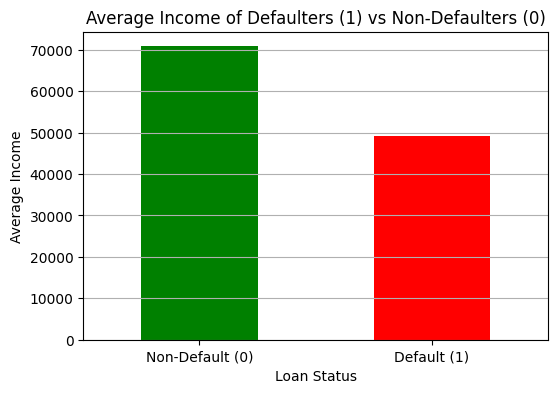

In [88]:
mean_age = df.groupby('loan_status')['person_income'].mean()
print(mean_age)

# Bar Plot
plt.figure(figsize=(6,4))
mean_age.plot(kind='bar', color=['green', 'red'])
plt.title('Average Income of Defaulters (1) vs Non-Defaulters (0)')
plt.ylabel('Average Income')
plt.xlabel('Loan Status')
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'], rotation=0)
plt.grid(axis='y')
plt.show()


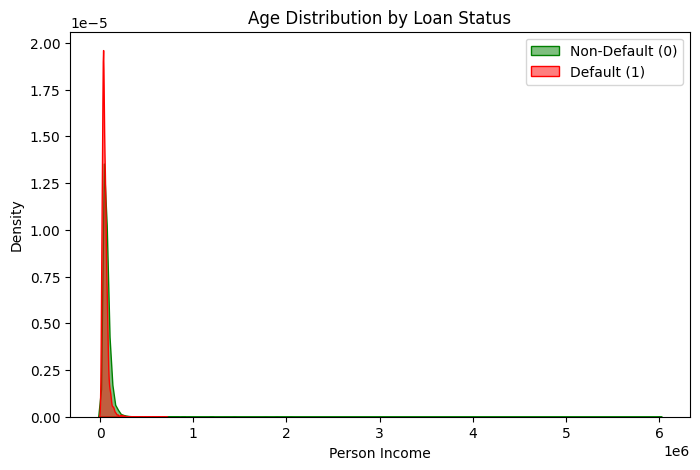

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['loan_status'] == 0], x='person_income', label='Non-Default (0)', fill=True, color='green', alpha=0.5)
sns.kdeplot(data=df[df['loan_status'] == 1], x='person_income', label='Default (1)', fill=True, color='red', alpha=0.5)

plt.title('Age Distribution by Loan Status')
plt.xlabel('Person Income')
plt.ylabel('Density')
plt.legend()
plt.show()


In [90]:
default_1['person_age'].skew()

np.float64(1.986854376127791)

<Axes: ylabel='Density'>

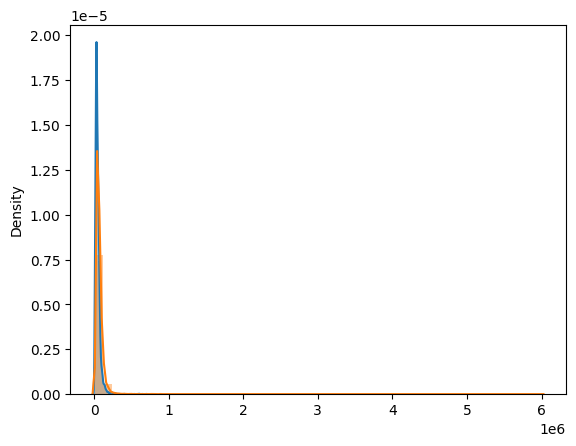

In [91]:
sns.distplot(x=default_1['person_income'])
sns.distplot(x=default_0['person_income'])

In [92]:
from scipy.stats import mannwhitneyu

age_default = df[df['loan_status'] == 1]['person_income']
age_nondefault = df[df['loan_status'] == 0]['person_income']

u_stat, p_val = mannwhitneyu(age_default, age_nondefault, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Result: Significant difference in Income distributions between defaulters and non-defaulters.")
else:
    print("Result: No significant difference in Income distributions between defaulters and non-defaulters.")


Mann-Whitney U Statistic: 56093141.5
P-Value: 0.0
Result: Significant difference in Income distributions between defaulters and non-defaulters.


In [93]:
from scipy.stats import ks_2samp

# Define samples
income_default = df[df['loan_status'] == 1]['person_income']
income_nondefault = df[df['loan_status'] == 0]['person_income']

# Perform KS Test
ks_stat, p_value = ks_2samp(income_default, income_nondefault)

print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in Income distributions between defaulters and non-defaulters.")
else:
    print("Result: No significant difference in Income distributions between defaulters and non-defaulters.")


KS Statistic: 0.2804
P-Value: 0.0000e+00
Result: Significant difference in Income distributions between defaulters and non-defaulters.


:

🔎 Analysis Summary:

Visual Insight (Bar Plot):

Non-Defaulters have a significantly higher average income (~71,000) compared to Defaulters (~49,000).

The difference in average income is clearly visible from the height of the bars.

Statistical Test (Kolmogorov-Smirnov Test):

KS Statistic: 0.2804 → Indicates a noticeable difference between the two income distributions.

P-Value: Practically 0.0000 → This is much lower than 0.05, meaning the result is highly statistically significant.

Conclusion:

There is a significant difference in income distributions between defaulters and non-defaulters.

People with lower incomes are more likely to default on loans.

Income is an important factor when assessing loan default risk.

📝 In short:

Higher income is associated with a lower probability of defaulting on loans, and this difference is both statistically significant and visually evident.



In [94]:
df.select_dtypes(include='number')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [95]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<Axes: ylabel='Density'>

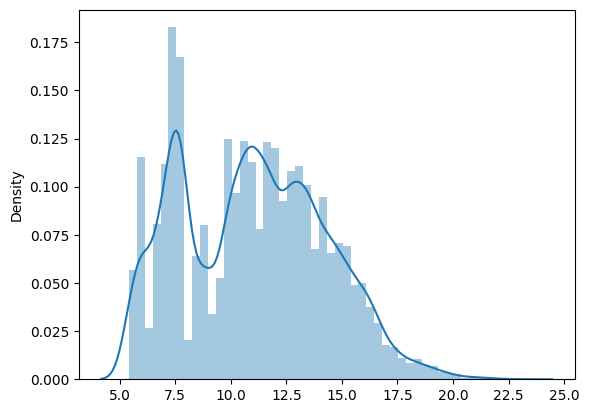

In [96]:
sns.distplot(x=df['loan_int_rate'])

In [97]:
df['loan_int_rate'].skew()

np.float64(0.2085503016908977)

In [98]:
# Fill with mean
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)


In [99]:
df.dropna(inplace=True)

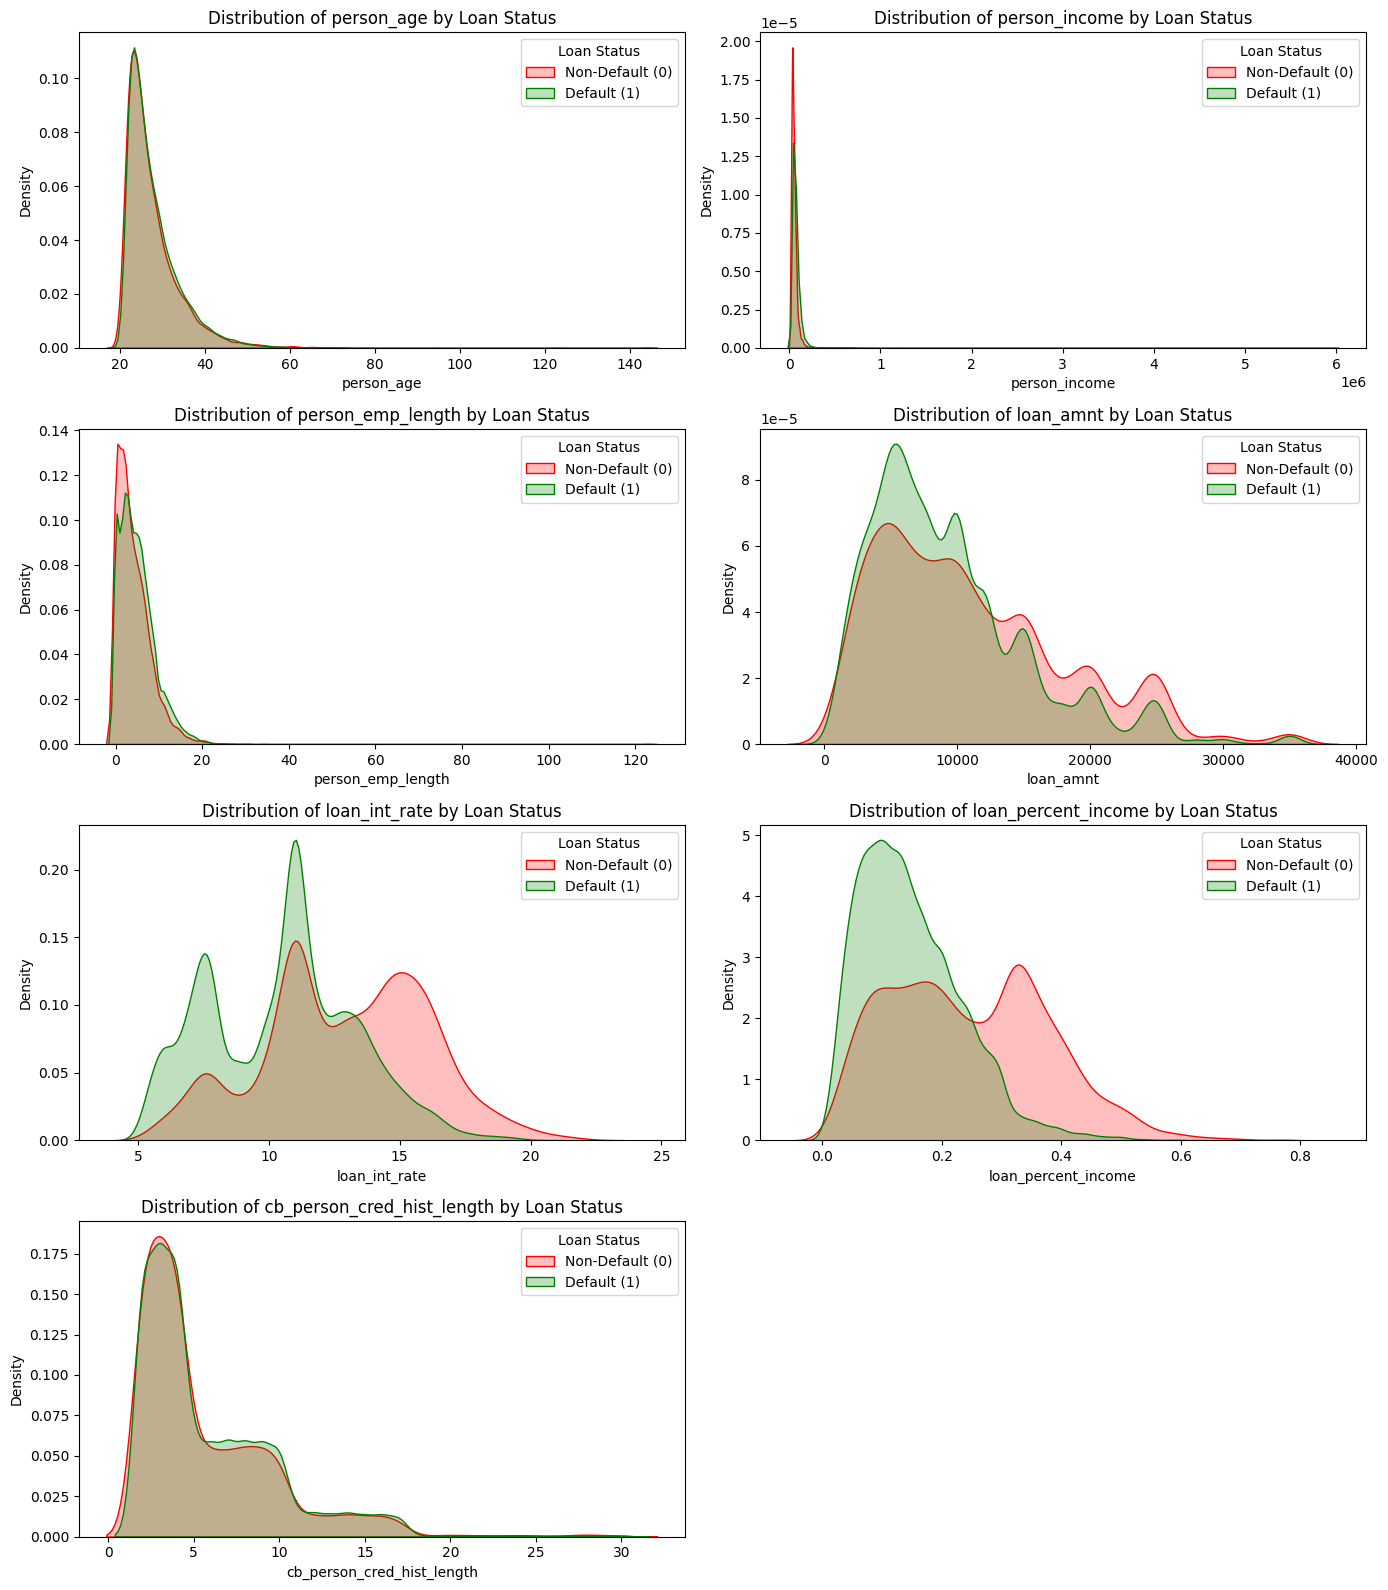

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_features = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

n_features = len(numerical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.kdeplot(data=df, x=feature, hue='loan_status', common_norm=False, fill=True, ax=ax, palette={0: 'green', 1: 'red'})
    ax.set_title(f'Distribution of {feature} by Loan Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [101]:
# Ensure loan_status is integer
df['loan_status'] = df['loan_status'].astype(int)


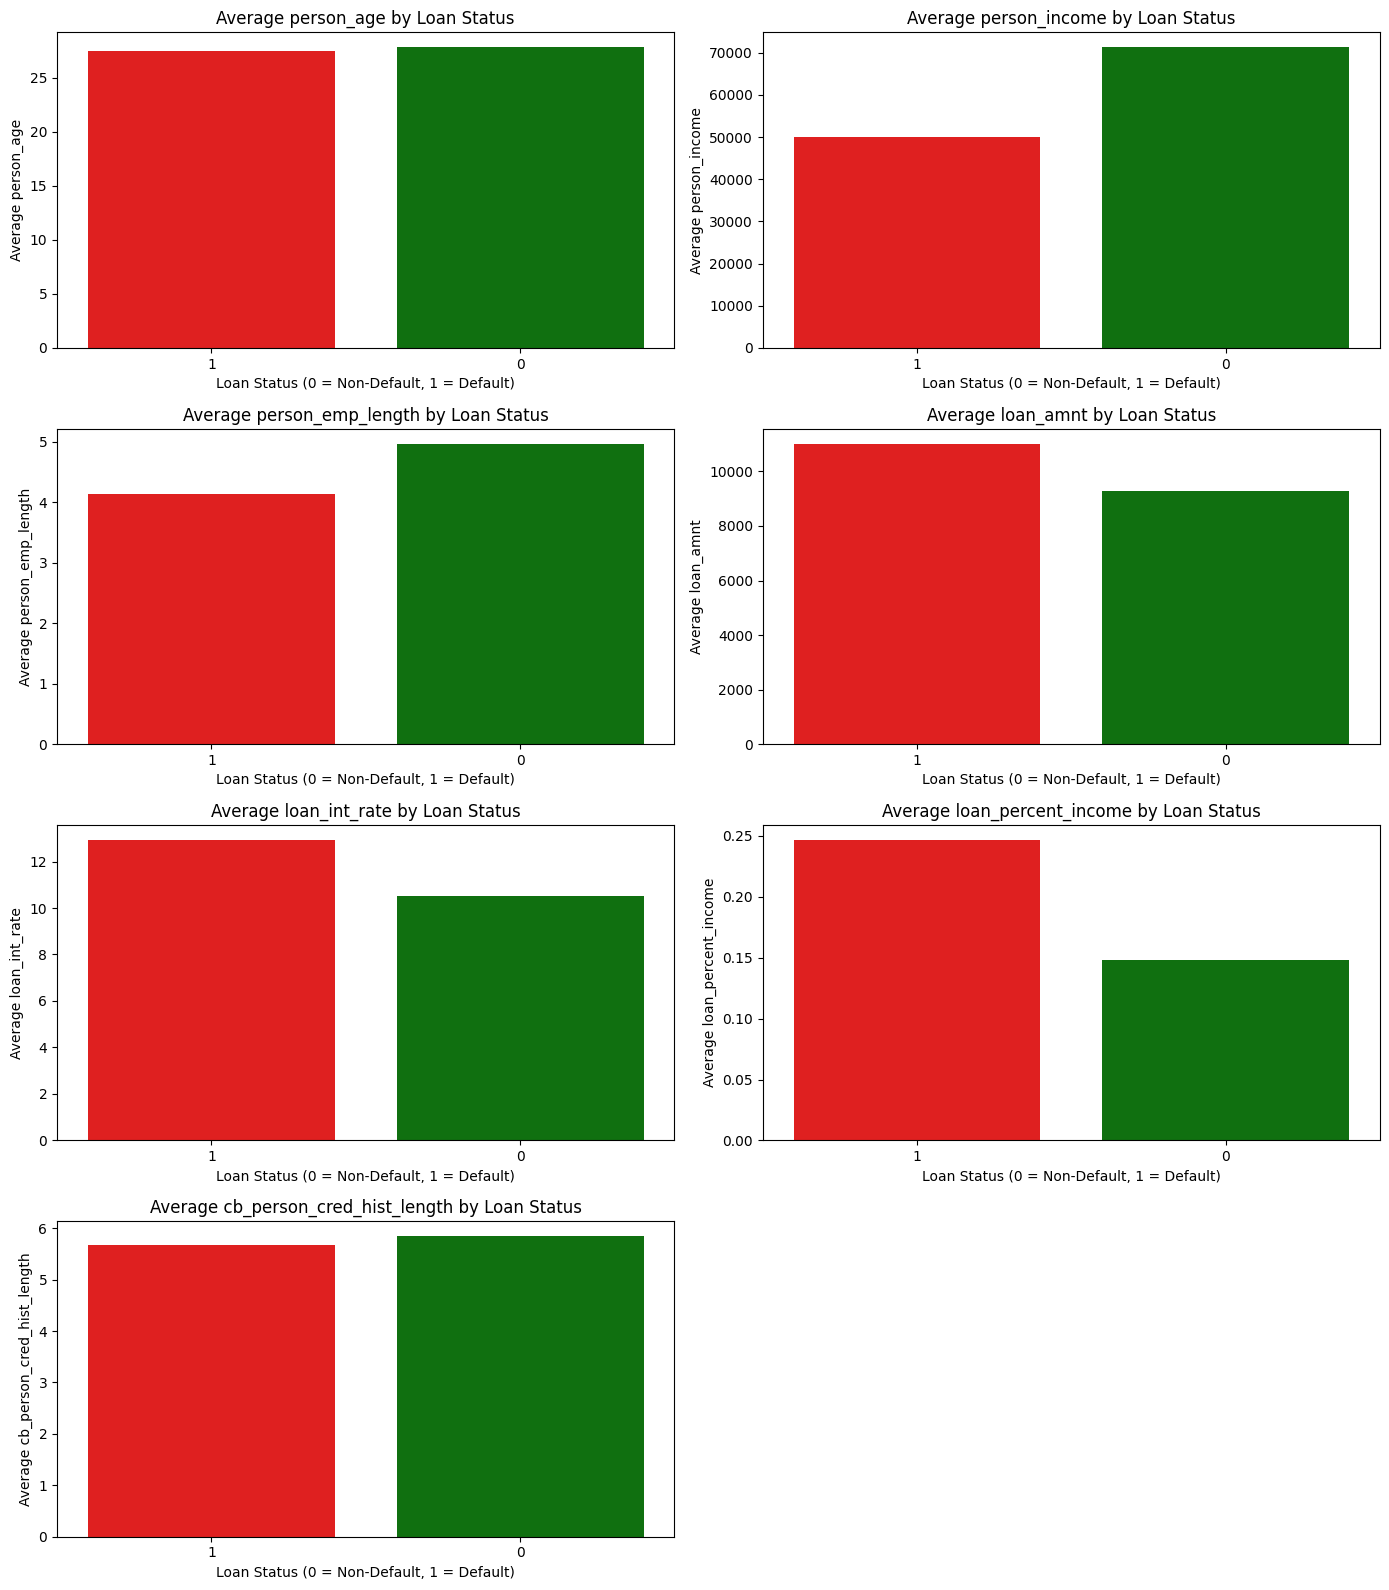

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If not already integer
df['loan_status'] = df['loan_status'].astype(str)  # <<< CONVERT to STRING

numerical_features = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

n_features = len(numerical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.barplot(
        data=df,
        x='loan_status',
        y=feature,
        palette={'0': 'green', '1': 'red'},   # <<< STRING keys
        estimator='mean',
        ci=None,
        ax=ax
    )
    ax.set_title(f'Average {feature} by Loan Status')
    ax.set_xlabel('Loan Status (0 = Non-Default, 1 = Default)')
    ax.set_ylabel(f'Average {feature}')

# Delete extra empty plots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


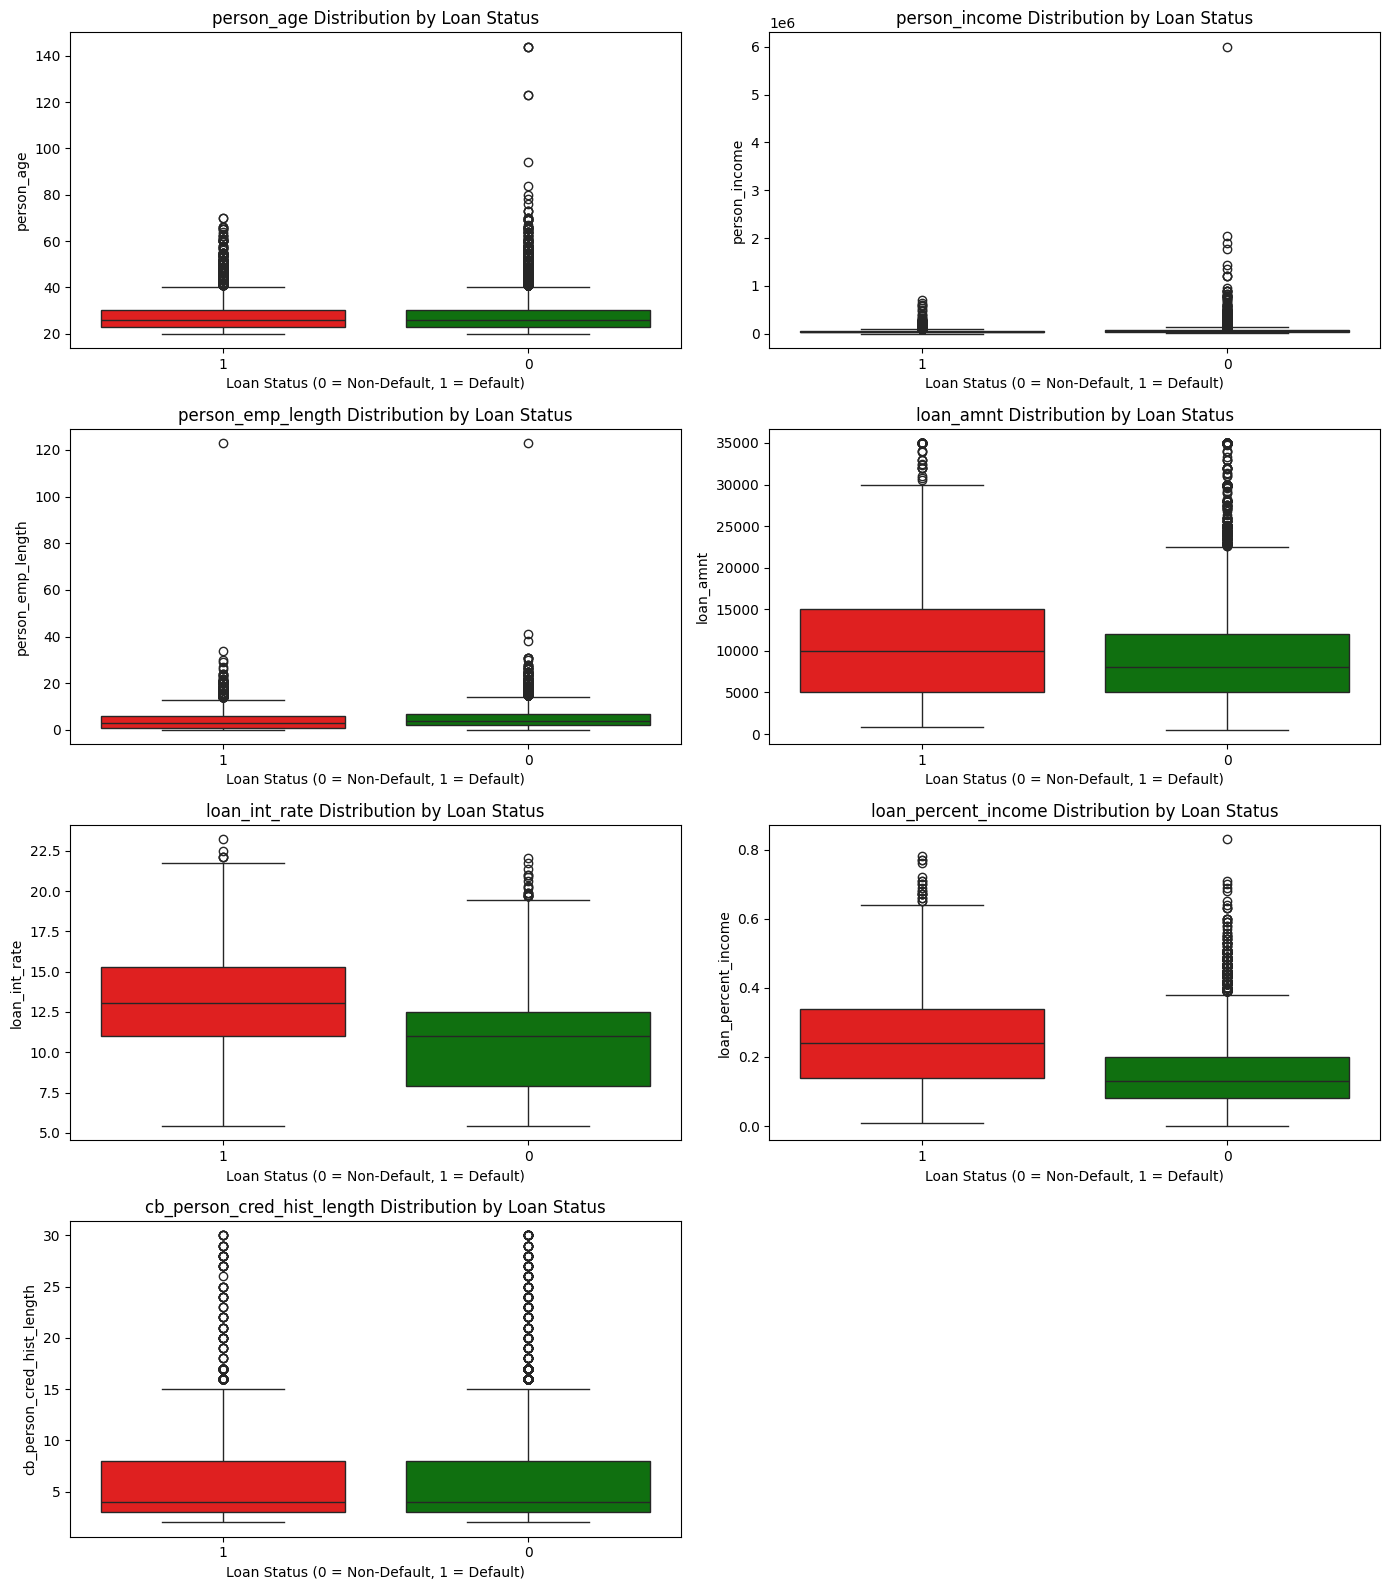

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['loan_status'] = df['loan_status'].astype(str)

numerical_features = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

n_features = len(numerical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    sns.boxplot(
        data=df,
        x='loan_status',
        y=feature,
        palette={'0': 'green', '1': 'red'},  
        ax=ax
    )
    ax.set_title(f'{feature} Distribution by Loan Status')
    ax.set_xlabel('Loan Status (0 = Non-Default, 1 = Default)')
    ax.set_ylabel(f'{feature}')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [104]:
from scipy.stats import mannwhitneyu, ks_2samp
import pandas as pd

# Ensure loan_status is integer or string properly
df['loan_status'] = df['loan_status'].astype(int)

numerical_features = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

print("Statistical Tests Summary:\n")

for feature in numerical_features:
    # Split data into two groups based on loan_status
    group0 = df[df['loan_status'] == 0][feature]
    group1 = df[df['loan_status'] == 1][feature]

    print(f"Feature: {feature}")
    
    # Mann-Whitney U Test
    u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')
    print(f"  Mann-Whitney U: {u_stat:.4f}, P-Value: {u_p:.4e}")
    if u_p < 0.05:
        print("   ➔ Significant difference based on Mann-Whitney U Test.")
    else:
        print("   ➔ No significant difference based on Mann-Whitney U Test.")

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = ks_2samp(group0, group1)
    print(f"  KS Test: {ks_stat:.4f}, P-Value: {ks_p:.4e}")
    if ks_p < 0.05:
        print("   ➔ Significant difference based on KS Test.")
    else:
        print("   ➔ No significant difference based on KS Test.")

    print("-" * 60)


Statistical Tests Summary:

Feature: person_age
  Mann-Whitney U: 88960806.5000, P-Value: 7.0391e-10
   ➔ Significant difference based on Mann-Whitney U Test.
  KS Test: 0.0347, P-Value: 5.0124e-06
   ➔ Significant difference based on KS Test.
------------------------------------------------------------
Feature: person_income
  Mann-Whitney U: 116531790.5000, P-Value: 0.0000e+00
   ➔ Significant difference based on Mann-Whitney U Test.
  KS Test: 0.2742, P-Value: 0.0000e+00
   ➔ Significant difference based on KS Test.
------------------------------------------------------------
Feature: person_emp_length
  Mann-Whitney U: 96420513.5000, P-Value: 1.5018e-67
   ➔ Significant difference based on Mann-Whitney U Test.
  KS Test: 0.1118, P-Value: 1.0294e-58
   ➔ Significant difference based on KS Test.
------------------------------------------------------------
Feature: loan_amnt
  Mann-Whitney U: 73908338.5000, P-Value: 4.0933e-60
   ➔ Significant difference based on Mann-Whitney U Test.


In [105]:
from scipy.stats import mannwhitneyu, ks_2samp
import pandas as pd

df['loan_status'] = df['loan_status'].astype(int)

numerical_features = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'
]

results = []

for feature in numerical_features:
    group0 = df[df['loan_status'] == 0][feature]
    group1 = df[df['loan_status'] == 1][feature]
    
    u_stat, u_p = mannwhitneyu(group0, group1, alternative='two-sided')
    
    ks_stat, ks_p = ks_2samp(group0, group1)
    
    results.append({
        'Feature': feature,
        'Mann-Whitney U Statistic': u_stat,
        'Mann-Whitney P-Value': u_p,
        'Mann-Whitney Significant': 'Yes' if u_p < 0.05 else 'No',
        'KS Statistic': ks_stat,
        'KS P-Value': ks_p,
        'KS Significant': 'Yes' if ks_p < 0.05 else 'No'
    })

results_df = pd.DataFrame(results)

results_df

,Feature,Mann-Whitney U Statistic,Mann-Whitney P-Value,Mann-Whitney Significant,KS Statistic,KS P-Value,KS Significant
0,person_age,88960806.5,7.039146e-10,Yes,0.034666,5.012365e-06,Yes
1,person_income,116531790.5,0.000000e+00,Yes,0.274222,0.000000e+00,Yes
2,person_emp_length,96420513.5,1.501798e-67,Yes,0.111760,1.029353e-58,Yes
3,loan_amnt,73908338.5,4.093348e-60,Yes,0.124048,2.798381e-72,Yes
4,loan_int_rate,48840276.0,0.000000e+00,Yes,0.310944,0.000000e+00,Yes
5,loan_percent_income,47363420.0,0.000000e+00,Yes,0.353022,0.000000e+00,Yes
6,cb_person_cred_hist_length,87757719.0,1.130291e-05,Yes,0.031456,4.884215e-05,Yes


1. About Skewness for loan_int_rate
Skewness = 0.208 → Slight positive skewness, but it's close to 0.

Conclusion: Distribution is fairly symmetric.
▶ Best way to fill missing values: Mean is appropriate here because the distribution is nearly normal.

2. General Insights from Plots
Boxplots show:

There are outliers in many features (person_age, person_income, loan_amnt, etc.).

Distributions between default (1) and non-default (0) groups are different.

Barplots of averages show:

Defaulters generally have:

Lower average income.

Lower average loan amounts.

Higher loan percent income (loan amount is a bigger % of their income).

Higher loan interest rates.

Density plots show:

Separation between default and non-default groups, especially in:

loan_int_rate

loan_percent_income

person_income

loan_amnt

3. Mann-Whitney U Test and KS Test Results
All features have significant differences between default and non-default groups (p-value ≈ 0 or very small).

KS Statistic is highest for:

loan_percent_income (0.353)

loan_int_rate (0.311)

person_income (0.274)

▶ These 3 features (loan_percent_income, loan_int_rate, person_income) show the biggest distribution shift between defaulters and non-defaulters.



📋 Summary
loan_int_rate skewness = 0.208 → Nearly symmetric → Fill missing values with Mean.

Defaulters have:

Lower incomes.

Higher loan percent of income.

Higher loan interest rates.

Most important features (biggest difference between defaulters and non-defaulters):

loan_percent_income

loan_int_rate

person_income

Tests (Mann-Whitney U and KS) show very significant differences for all features.

Outliers are present in income, loan amount, and age.

<Axes: >

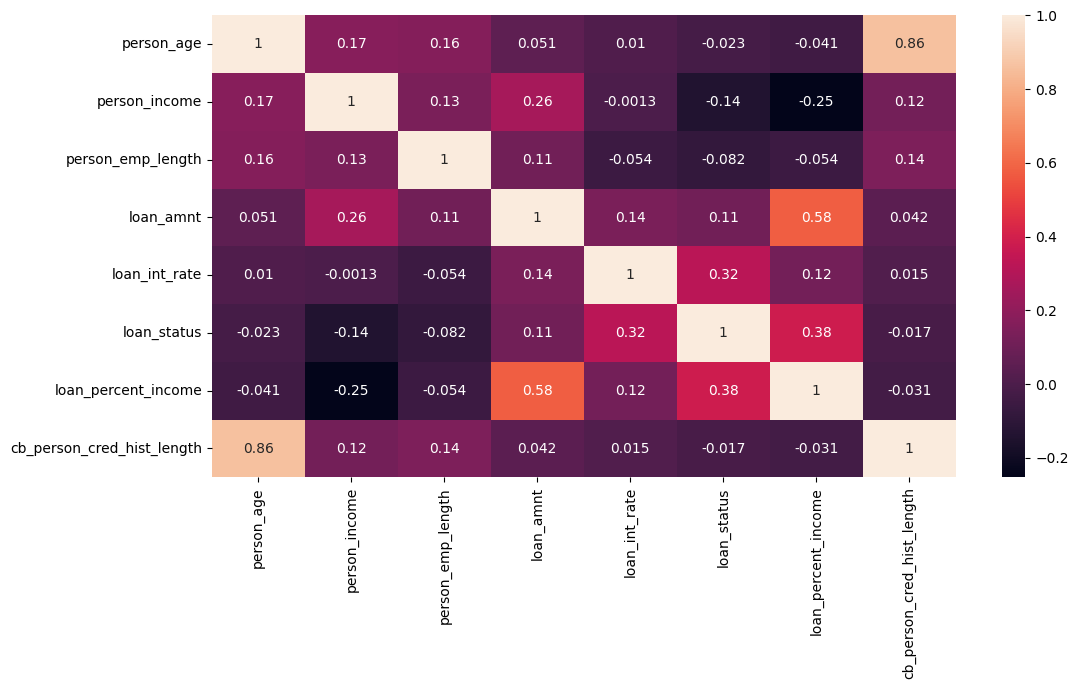

In [106]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

📋 Key Insights
Age and credit history length are very highly correlated (0.86).

→ Older people tend to have longer credit histories (makes sense!).

Loan amount and loan percent income are moderately correlated (0.58).

→ Bigger loans naturally form a higher % of income.

Loan status (default or not) has:

Negative correlation with income (-0.14): Higher income → Less likely to default.

Positive correlation with loan percent income (0.38): Larger loan relative to income → More chance of default.

Positive correlation with loan interest rate (0.32): Higher interest rates → More chance of default.

Income and loan percent income are negatively correlated (-0.25).

→ Higher income → Smaller loan percent of income.

Employment length doesn't show strong correlation with default.

No multicollinearity issue except person_age and cb_person_cred_hist_length (correlation = 0.86).



In [107]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [108]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [109]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [110]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


<Axes: xlabel='person_income'>

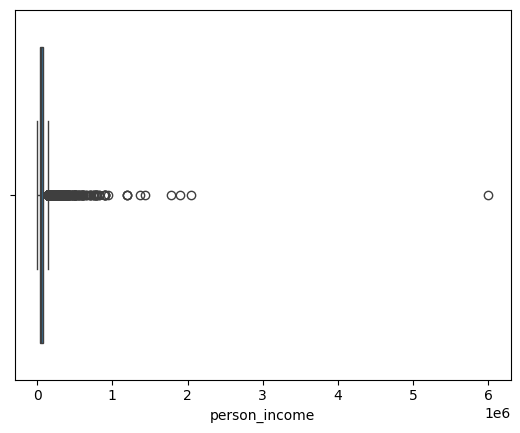

In [112]:
sns.boxplot(x=df['person_income'])

In [121]:
df.select_dtypes(include='number')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


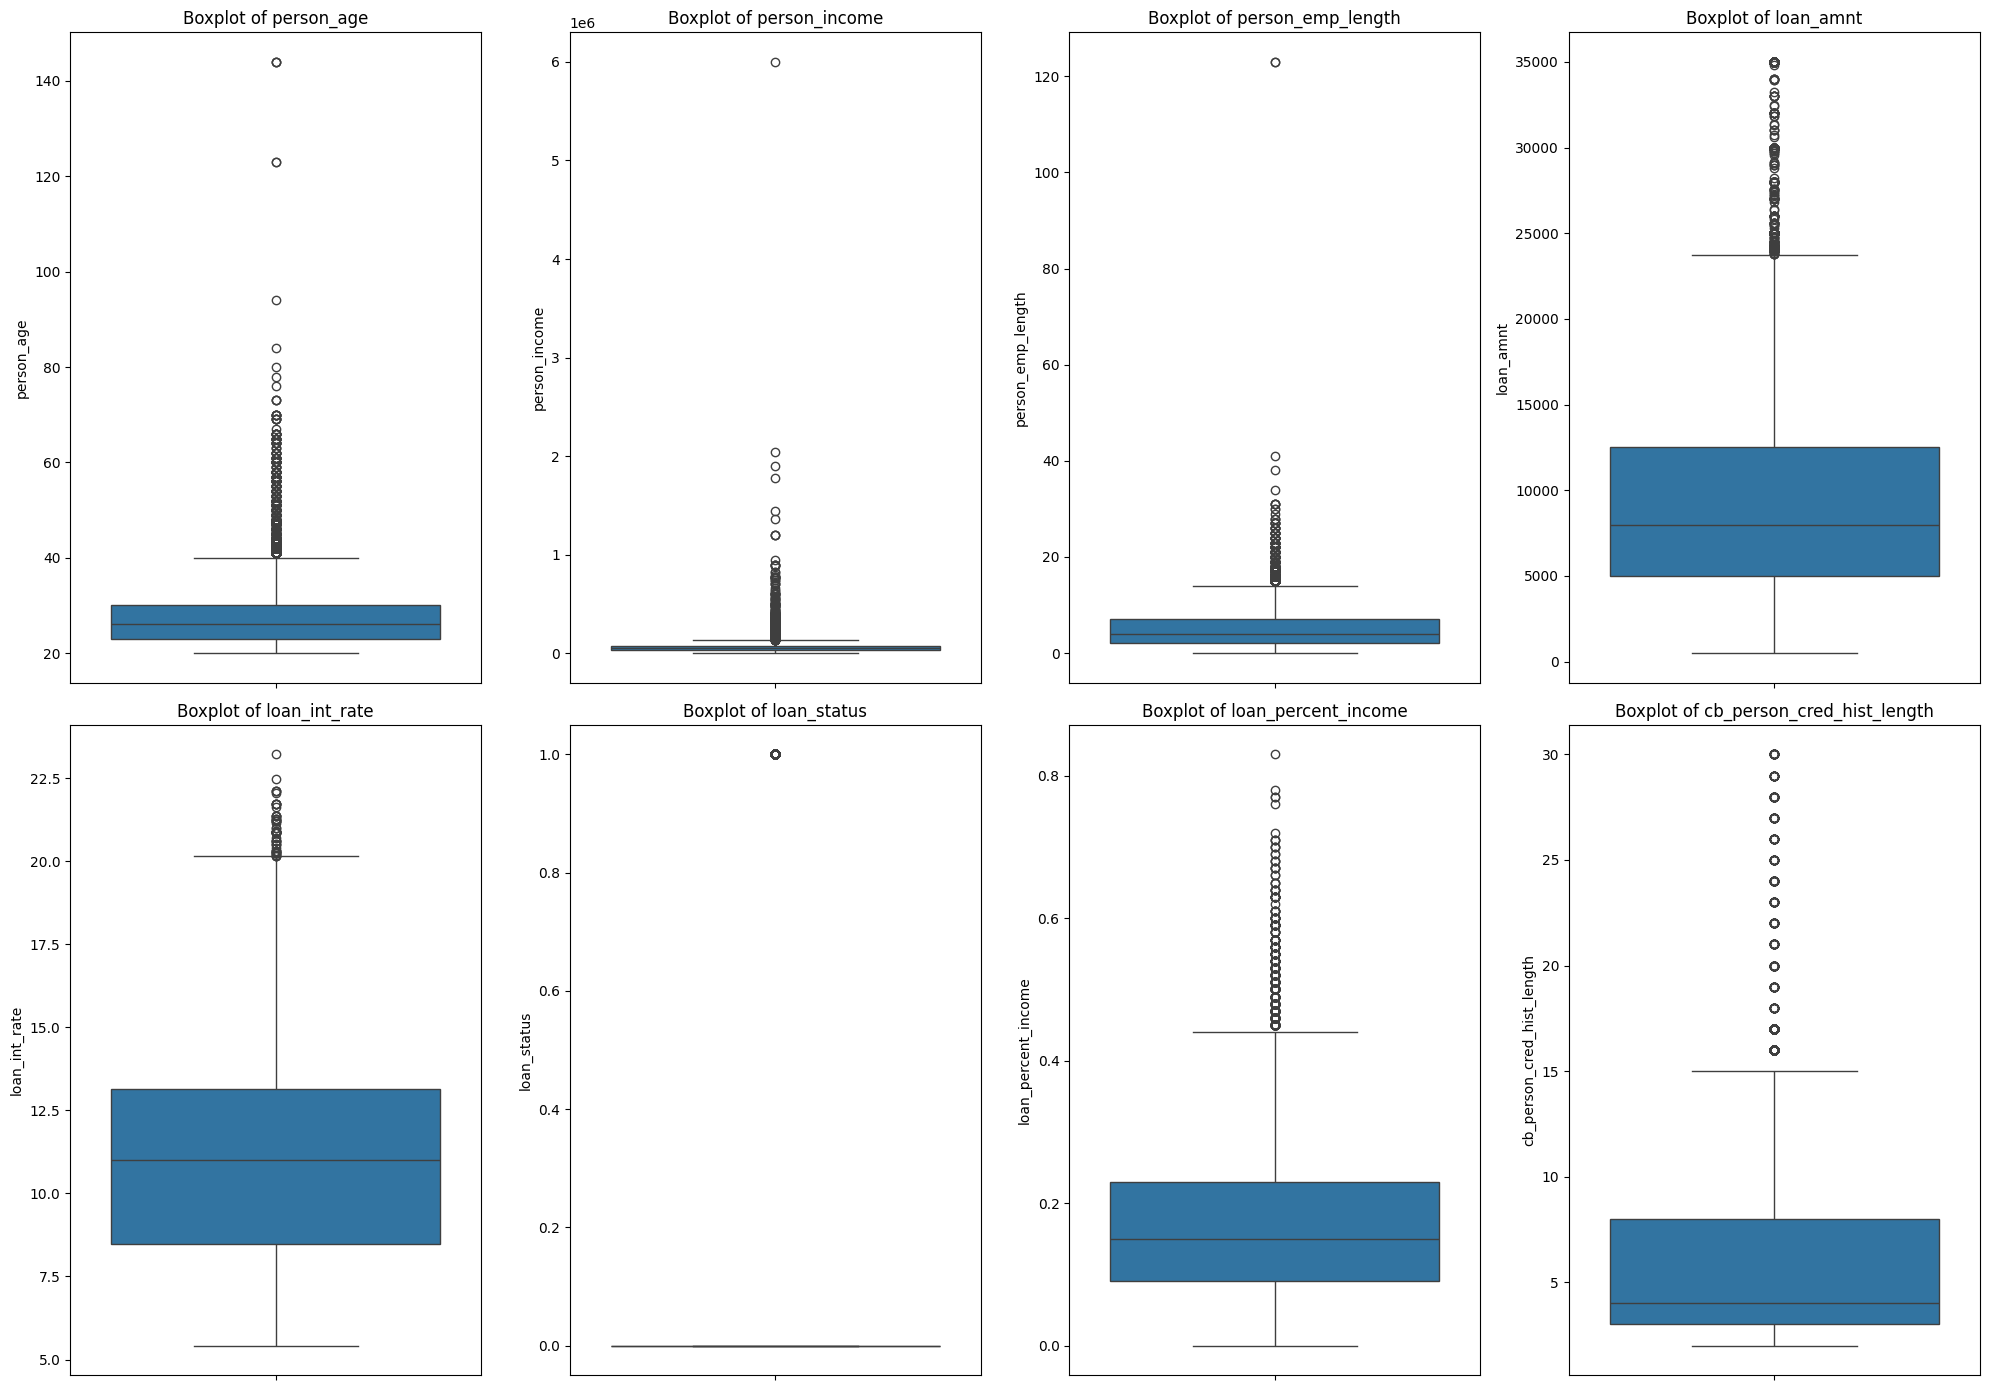

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_status", "loan_percent_income", "cb_person_cred_hist_length"
]


fig, axes = plt.subplots(2, 4, figsize=(20, 14))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()



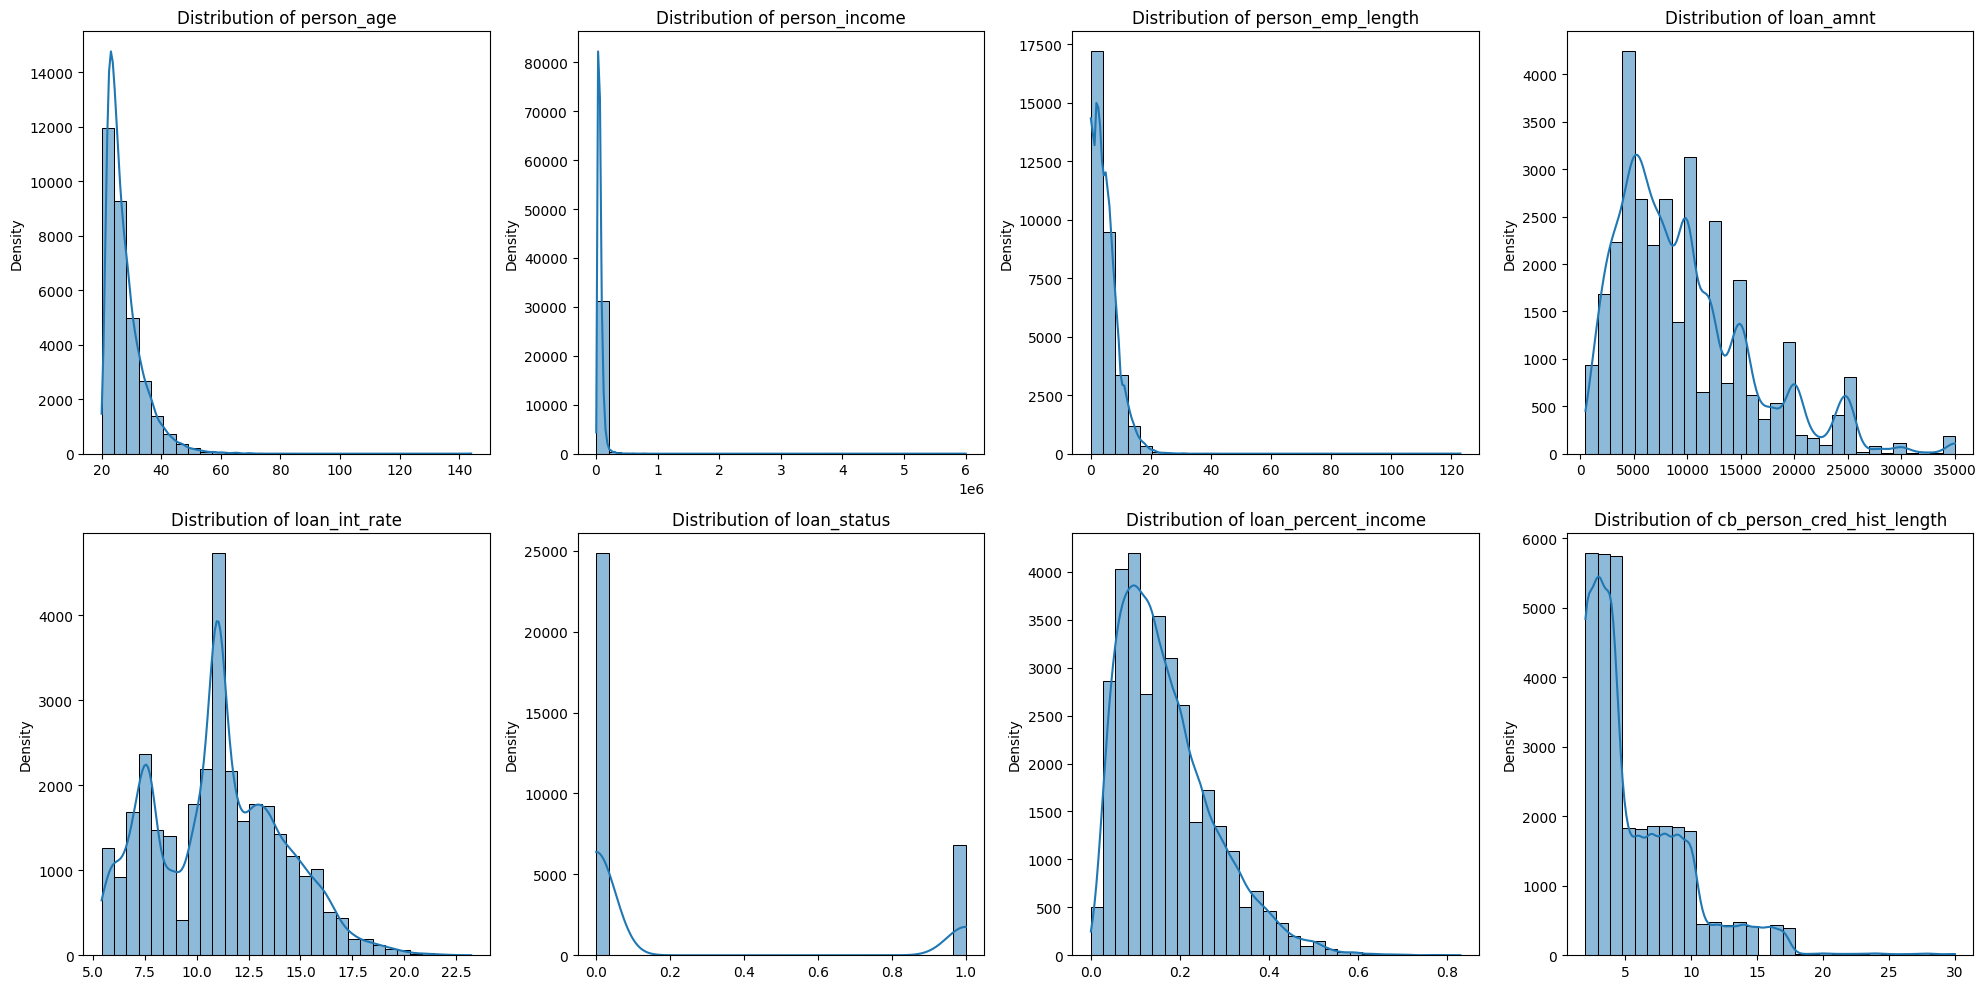

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
columns = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_status", "loan_percent_income", "cb_person_cred_hist_length"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten() 

for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30) 
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


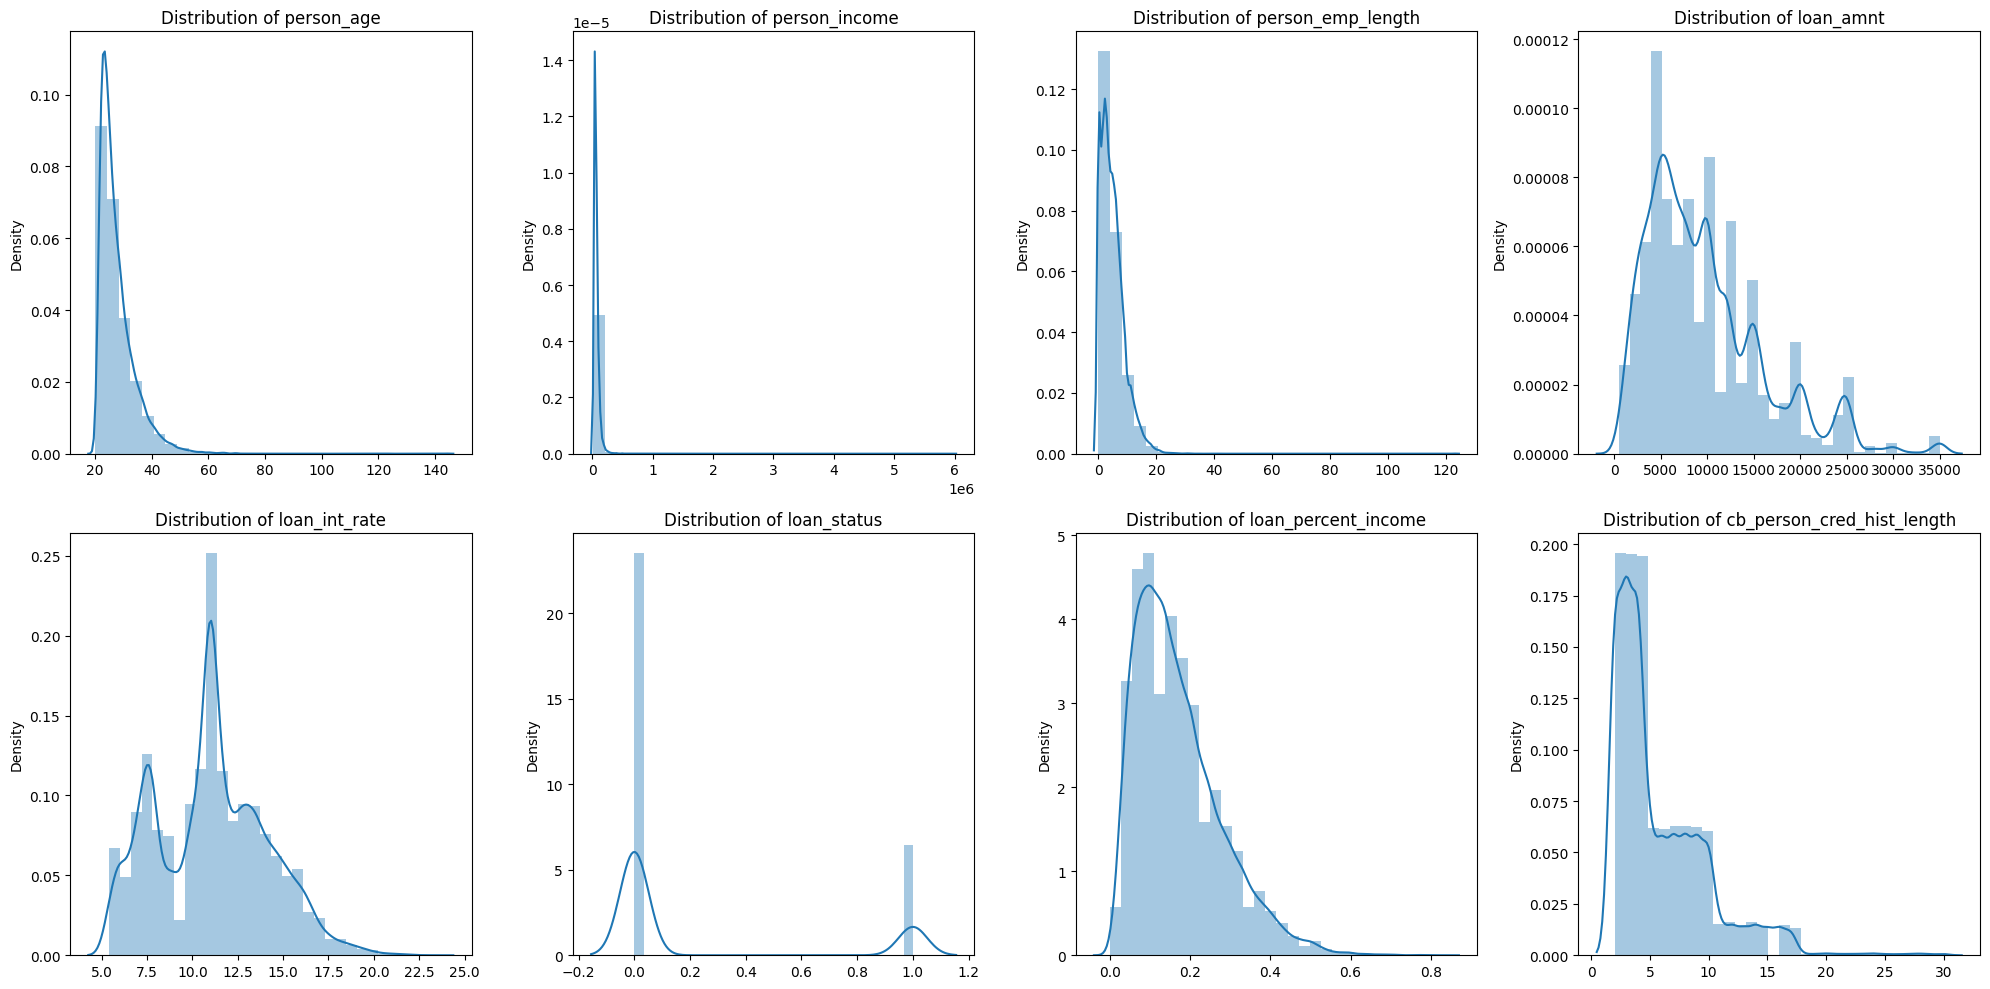

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
columns = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_status", "loan_percent_income", "cb_person_cred_hist_length"
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten() 

for i, col in enumerate(columns):
    sns.distplot(df[col], kde=True, ax=axes[i], bins=30) 
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [127]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    """
    
    Parameters:
    df (pd.DataFrame): The input dataframe.
    columns (list): List of columns to remove outliers from.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Example usage:
columns_to_clean = [
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length'
]

# Assuming your dataframe is named df
df_clean = remove_outliers_iqr(df, columns_to_clean)


In [128]:
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.140000,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.740000,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.990000,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.290000,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32283,45,64000,MORTGAGE,3.0,PERSONAL,A,6000,7.290000,0,0.09,N,12
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.490000,1,0.18,N,15
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,11.011695,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.620000,0,0.04,N,15


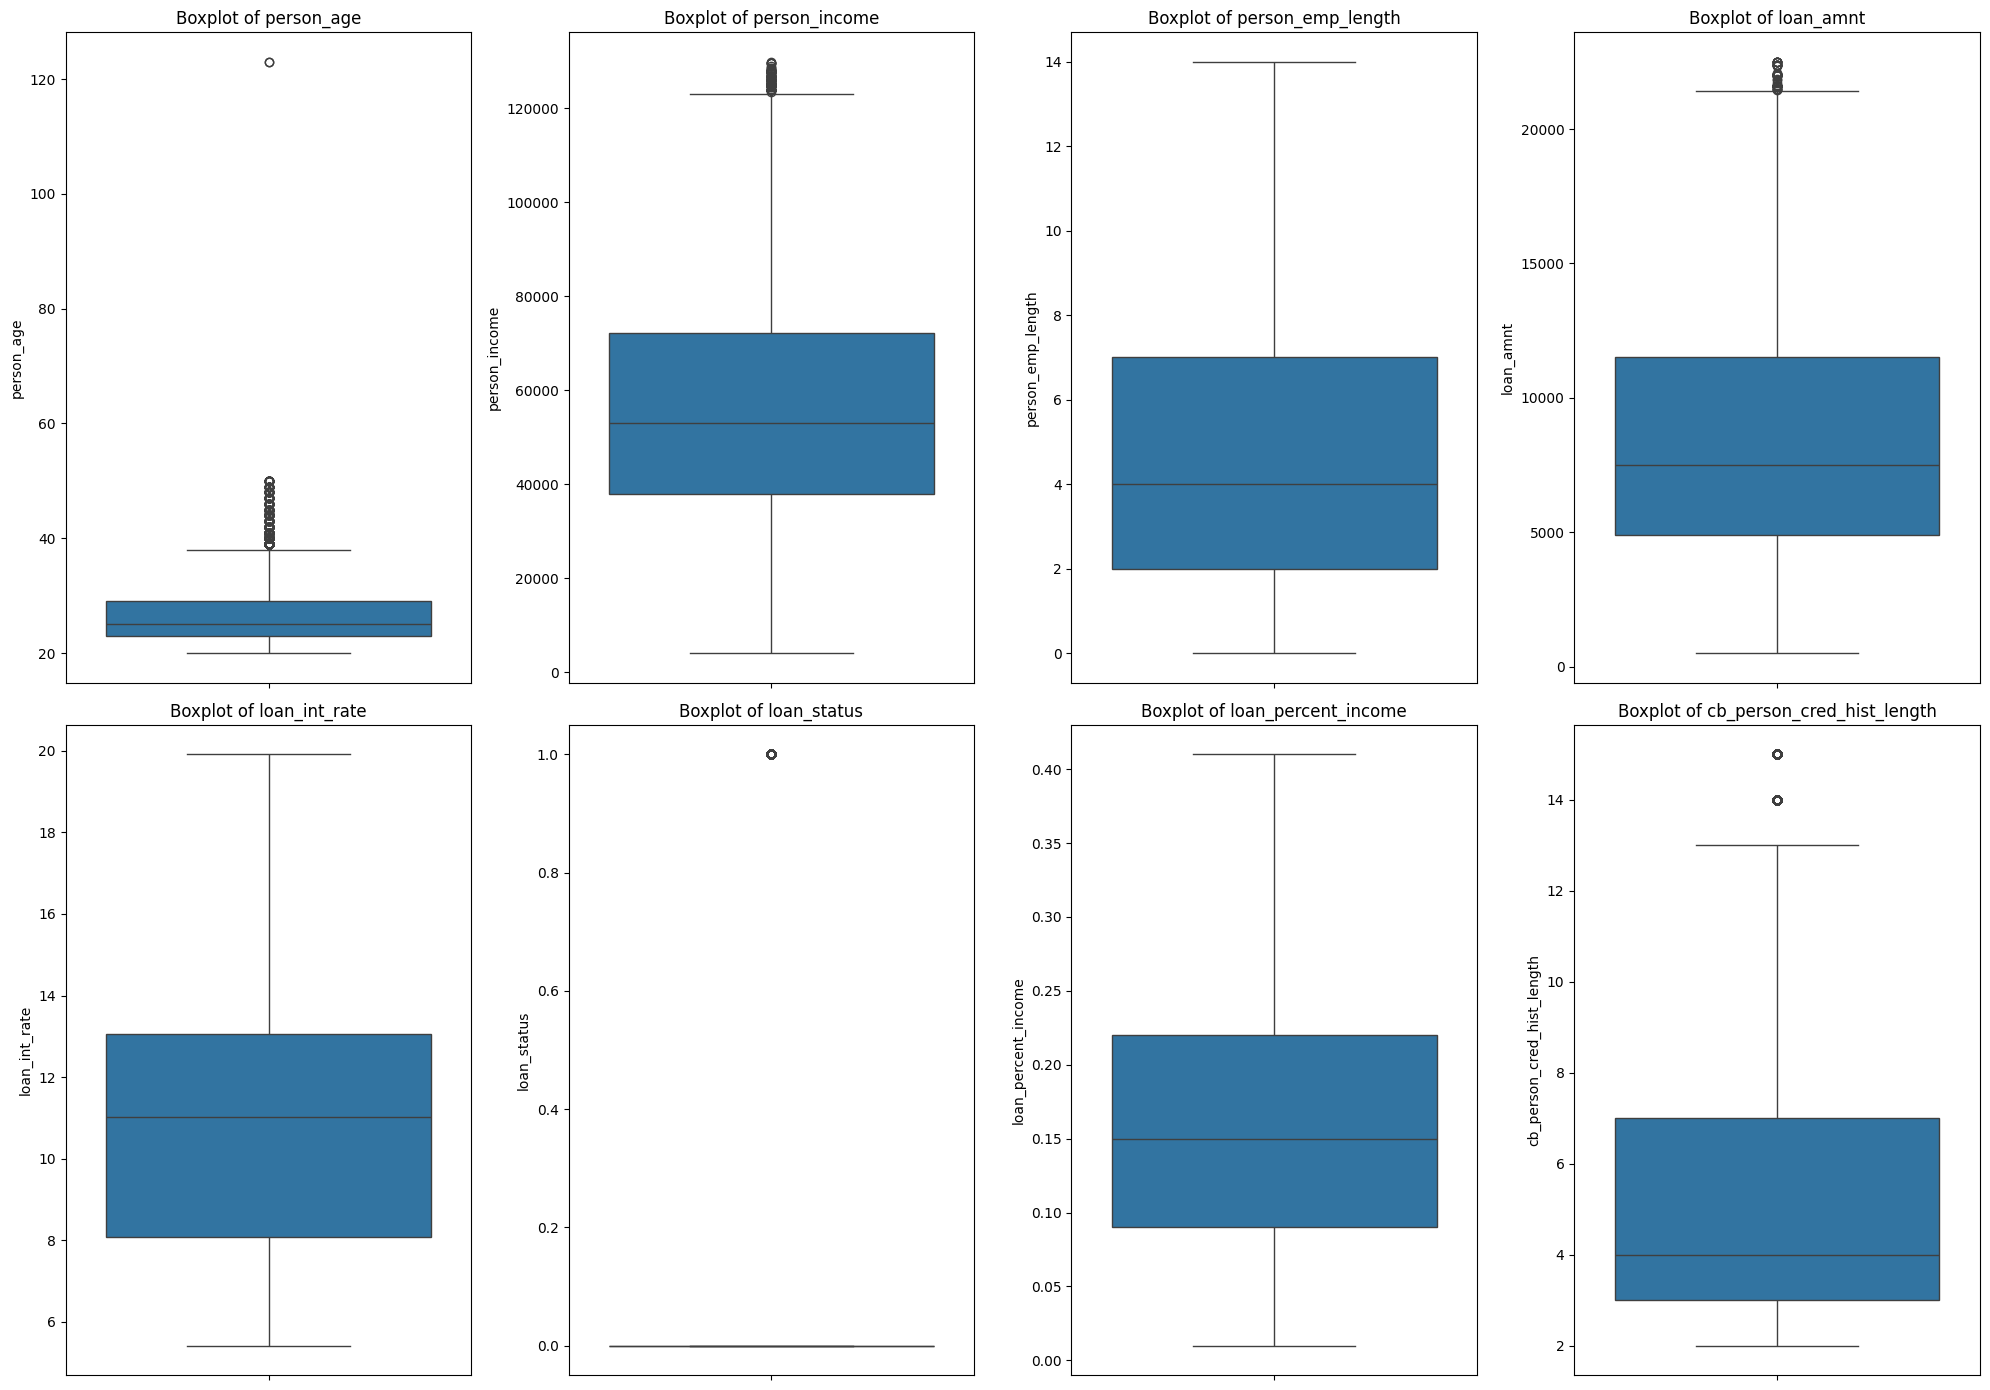

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    "person_age", "person_income", "person_emp_length", "loan_amnt",
    "loan_int_rate", "loan_status", "loan_percent_income", "cb_person_cred_hist_length"
]


fig, axes = plt.subplots(2, 4, figsize=(20, 14))  
axes = axes.flatten()  

for i, col in enumerate(columns):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [131]:
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.140000,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.740000,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.990000,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.290000,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32283,45,64000,MORTGAGE,3.0,PERSONAL,A,6000,7.290000,0,0.09,N,12
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.490000,1,0.18,N,15
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,11.011695,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.620000,0,0.04,N,15


In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X = df.drop('loan_status', axis=1)
y = df['loan_status']

ordinal_features = ['loan_grade', 'cb_person_default_on_file']
onehot_features = ['person_home_ownership', 'loan_intent']
numerical_features = [col for col in X.columns if col not in ordinal_features + onehot_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('ohe', OneHotEncoder(drop='first'), onehot_features),
        ('num', 'passthrough', numerical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4710
           1       0.97      0.72      0.83      1335

    accuracy                           0.93      6045
   macro avg       0.95      0.86      0.89      6045
weighted avg       0.94      0.93      0.93      6045



In [136]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score

X = df.drop('loan_status', axis=1)
y = df['loan_status']

ordinal_features = ['loan_grade', 'cb_person_default_on_file']
onehot_features = ['person_home_ownership', 'loan_intent']
numerical_features = [col for col in X.columns if col not in ordinal_features + onehot_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('ohe', OneHotEncoder(drop='first'), onehot_features),
        ('num', 'passthrough', numerical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
    }

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', verbose=2, n_jobs=-1)
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

mlflow.set_experiment("loan_default_prediction")

with mlflow.start_run():
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlflow.log_params(grid_search.best_params_)

    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)

    mlflow.sklearn.log_model(best_model, "random_forest_model")

    print("Best Parameters:", grid_search.best_params_)
    print(classification_report(y_test, y_pred))


2025/04/07 12:25:15 INFO mlflow.tracking.fluent: Experiment with name 'loan_default_prediction' does not exist. Creating a new experiment.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


2025/04/07 12:26:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4710
           1       0.97      0.71      0.82      1335

    accuracy                           0.93      6045
   macro avg       0.95      0.85      0.89      6045
weighted avg       0.93      0.93      0.93      6045

🏃 View run casual-swan-957 at: http://127.0.0.1:5000/#/experiments/562165793518660457/runs/ea89d1fe56414bdca5adb47f6f97b9fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/562165793518660457


In [137]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score

X = df.drop('loan_status', axis=1)
y = df['loan_status']

ordinal_features = ['loan_grade', 'cb_person_default_on_file']
onehot_features = ['person_home_ownership', 'loan_intent']
numerical_features = [col for col in X.columns if col not in ordinal_features + onehot_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('ohe', OneHotEncoder(drop='first'), onehot_features),
        ('num', StandardScaler(), numerical_features)   
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', verbose=2, n_jobs=-1)
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

mlflow.set_experiment("loan_default_prediction_GBM")

with mlflow.start_run():
    grid_search.fit(X_train, y_train)

    best_model_GB = grid_search.best_estimator_
    y_pred = best_model_GB.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.sklearn.log_model(best_model_GB, "gradient_boosting_model")

    print("Best Parameters:", grid_search.best_params_)
    print(classification_report(y_test, y_pred))


2025/04/07 12:27:16 INFO mlflow.tracking.fluent: Experiment with name 'loan_default_prediction_GBM' does not exist. Creating a new experiment.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


2025/04/07 12:27:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4710
           1       0.97      0.73      0.83      1335

    accuracy                           0.93      6045
   macro avg       0.95      0.86      0.90      6045
weighted avg       0.94      0.93      0.93      6045

🏃 View run righteous-flea-788 at: http://127.0.0.1:5000/#/experiments/444497713230456098/runs/b0b97830d08347e7af9df9f0e2e450d2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/444497713230456098


In [139]:
import joblib

joblib.dump(best_model_GB, 'best_model_gb.pkl')


['best_model_gb.pkl']

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4680,   30],
       [ 364,  971]])

In [135]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score

X = df.drop('loan_status', axis=1)
y = df['loan_status']

ordinal_features = ['loan_grade', 'cb_person_default_on_file']
onehot_features = ['person_home_ownership', 'loan_intent']
numerical_features = [col for col in X.columns if col not in ordinal_features + onehot_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('ohe', OneHotEncoder(drop='first'), onehot_features),
        ('num', StandardScaler(), numerical_features)   
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__class_weight': ['balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='recall', verbose=2, n_jobs=-1)

mlflow.set_experiment("loan_default_prediction_SVC")

with mlflow.start_run():
    grid_search.fit(X_train, y_train)

    best_model_SVC = grid_search.best_estimator_
    y_pred = best_model_SVC.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.sklearn.log_model(best_model_SVC, "svc_model")

    print("Best Parameters:", grid_search.best_params_)
    print(classification_report(y_test, y_pred))


2025/04/07 12:15:37 INFO mlflow.tracking.fluent: Experiment with name 'loan_default_prediction_SVC' does not exist. Creating a new experiment.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


2025/04/07 12:23:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.93      0.86      0.90      4710
           1       0.62      0.78      0.69      1335

    accuracy                           0.85      6045
   macro avg       0.78      0.82      0.80      6045
weighted avg       0.86      0.85      0.85      6045



In [140]:
df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.140000,0,0.10,N,2
5,21,9900,OWN,2.0,VENTURE,A,2500,7.140000,1,0.25,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.740000,1,0.16,N,3
19,24,10800,MORTGAGE,8.0,EDUCATION,B,1750,10.990000,1,0.16,N,2
23,24,10980,OWN,0.0,PERSONAL,A,1500,7.290000,0,0.14,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32283,45,64000,MORTGAGE,3.0,PERSONAL,A,6000,7.290000,0,0.09,N,12
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.490000,1,0.18,N,15
32289,40,33000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,1000,11.011695,0,0.03,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.620000,0,0.04,N,15


In [142]:
df['loan_grade'].value_counts()

loan_grade
A    9942
B    9668
C    6057
D    3392
E     887
F     216
G      60
Name: count, dtype: int64